In [1]:
import sys 
sys.path.append('/n/home12/binxuwang/Github/Closed-loop-visual-insilico')
from core.model_load_utils import load_model_transform

In [2]:
from horama import maco, plot_maco
import torchvision.transforms as T
import antialiased_cnns
import matplotlib.pyplot as plt
from pprint import pprint

### Anti aliasing CNN

In [1]:
import antialiased_cnns
model = antialiased_cnns.resnet50(pretrained=True) 

Downloading: "https://antialiased-cnns.s3.us-east-2.amazonaws.com/weights_v0.1/resnet50_lpf4_finetune-cad66808.pth" to /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/torch_cache/hub/checkpoints/resnet50_lpf4_finetune-cad66808.pth
100%|██████████| 97.9M/97.9M [00:02<00:00, 40.2MB/s]


In [45]:
model = antialiased_cnns.resnet50(pretrained=True) 
model = model.eval().cuda()
model.requires_grad_(False);
normalizer = T.Compose([
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    T.Resize([224,224])
])

In [38]:
def objective(img):
    out = model(normalizer(img))
    return out[:,1].mean()

100%|██████████| 500/500 [00:05<00:00, 90.96it/s]


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.01,
 'total_steps': 500,
 'values_range': (0, 1)}


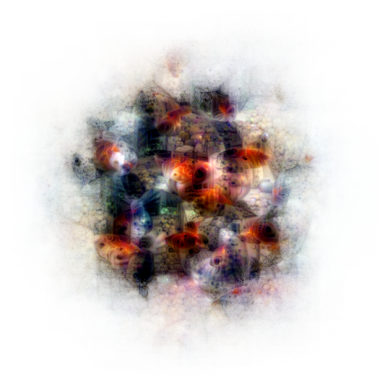

In [43]:
maco_hyperparams = dict(total_steps=500, learning_rate=0.5, image_size=512,
        model_input_size=224, noise=0.01, values_range=(0, 1),
        crops_per_iteration=2, box_size=(0.20, 0.25),)
image1, alpha1 = maco(objective, **maco_hyperparams, device='cuda')
pprint(maco_hyperparams)
plot_maco(image1, alpha1)

100%|██████████| 1000/1000 [00:10<00:00, 91.48it/s]


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.25,
 'model_input_size': 224,
 'noise': 0.01,
 'total_steps': 1000,
 'values_range': (0, 1)}


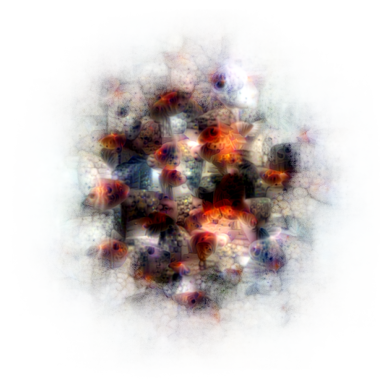

In [44]:
maco_hyperparams = dict(total_steps=1000, learning_rate=0.25, image_size=512,
        model_input_size=224, noise=0.01, values_range=(0, 1),
        crops_per_iteration=2, box_size=(0.20, 0.25),)
image1, alpha1 = maco(objective, **maco_hyperparams, device='cuda')
pprint(maco_hyperparams)
plot_maco(image1, alpha1)

### Load robust r50 and normal r50 as cmp

In [5]:
R50_model, R50_transform = load_model_transform('resnet50')
robust_R50_model, robust_R50_transform = load_model_transform('resnet50_robust')

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [51]:
def objective_R50(img):
    return R50_model(normalizer(img))[:,1].mean()

def objective_robust_R50(img):
    return robust_R50_model(normalizer(img))[:,1].mean()

def objective_anti_alias(img):
    return model(normalizer(img))[:,1].mean()


100%|██████████| 500/500 [00:04<00:00, 100.25it/s]


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.01,
 'total_steps': 500,
 'values_range': (0, 1)}


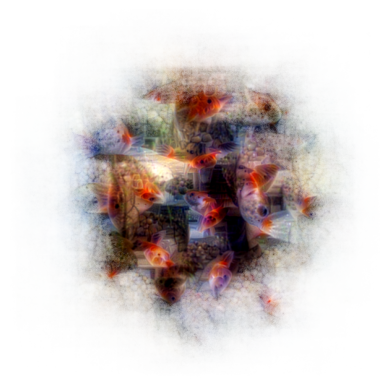

100%|██████████| 500/500 [00:05<00:00, 99.68it/s] 


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.01,
 'total_steps': 500,
 'values_range': (0, 1)}


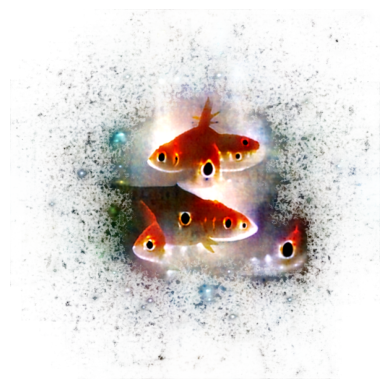

100%|██████████| 500/500 [00:05<00:00, 92.20it/s]


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.01,
 'total_steps': 500,
 'values_range': (0, 1)}


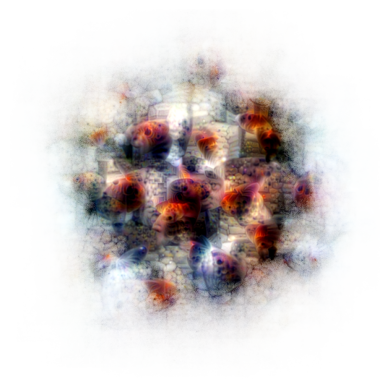

In [55]:
maco_hyperparams = dict(total_steps=500, learning_rate=0.5, image_size=512,
        model_input_size=224, noise=0.01, values_range=(0, 1),
        crops_per_iteration=2, box_size=(0.20, 0.25),)

for objective in [objective_R50, objective_robust_R50, objective_anti_alias]:
    image1, alpha1 = maco(objective, **maco_hyperparams, device='cuda')
    pprint(maco_hyperparams)
    plot_maco(image1, alpha1)
    plt.show()

100%|██████████| 500/500 [00:04<00:00, 100.11it/s]


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.1,
 'total_steps': 500,
 'values_range': (0, 1)}


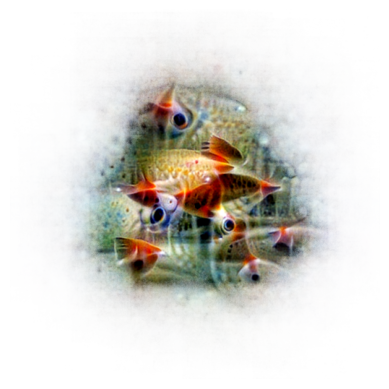

100%|██████████| 500/500 [00:04<00:00, 100.33it/s]


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.1,
 'total_steps': 500,
 'values_range': (0, 1)}


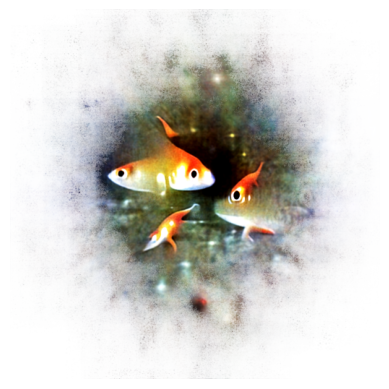

100%|██████████| 500/500 [00:05<00:00, 92.71it/s]


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.1,
 'total_steps': 500,
 'values_range': (0, 1)}


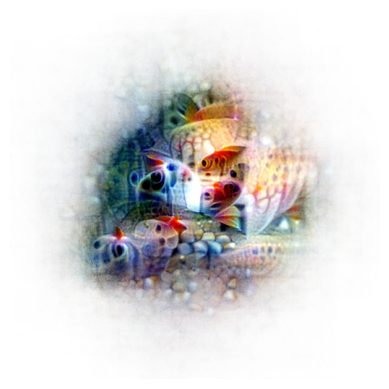

In [57]:
maco_hyperparams = dict(total_steps=500, learning_rate=0.5, image_size=512,
        model_input_size=224, noise=0.1, values_range=(0, 1),
        crops_per_iteration=2, box_size=(0.20, 0.25),)

for objective in [objective_R50, objective_robust_R50, objective_anti_alias]:
    image1, alpha1 = maco(objective, **maco_hyperparams, device='cuda')
    pprint(maco_hyperparams)
    plot_maco(image1, alpha1)
    plt.show()

100%|██████████| 500/500 [00:05<00:00, 99.33it/s] 


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.2,
 'total_steps': 500,
 'values_range': (0, 1)}


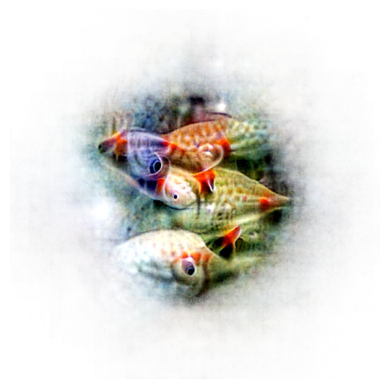

100%|██████████| 500/500 [00:04<00:00, 100.48it/s]


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.2,
 'total_steps': 500,
 'values_range': (0, 1)}


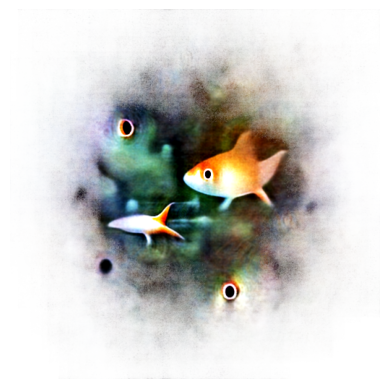

100%|██████████| 500/500 [00:05<00:00, 92.89it/s]


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.2,
 'total_steps': 500,
 'values_range': (0, 1)}


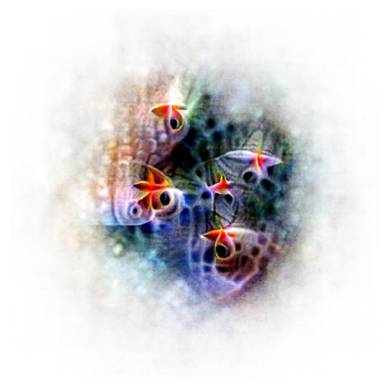

In [56]:
maco_hyperparams = dict(total_steps=500, learning_rate=0.5, image_size=512,
        model_input_size=224, noise=0.2, values_range=(0, 1),
        crops_per_iteration=2, box_size=(0.20, 0.25),)

for objective in [objective_R50, objective_robust_R50, objective_anti_alias]:
    image1, alpha1 = maco(objective, **maco_hyperparams, device='cuda')
    pprint(maco_hyperparams)
    plot_maco(image1, alpha1)
    plt.show()

In [61]:
robust_R50_model.conv1.weight.shape

torch.Size([64, 3, 7, 7])

### Inspecting First layer conv1 weights

In [6]:
R50_model, R50_transform = load_model_transform('resnet50')
robust_R50_model, robust_R50_transform = load_model_transform('resnet50_robust')

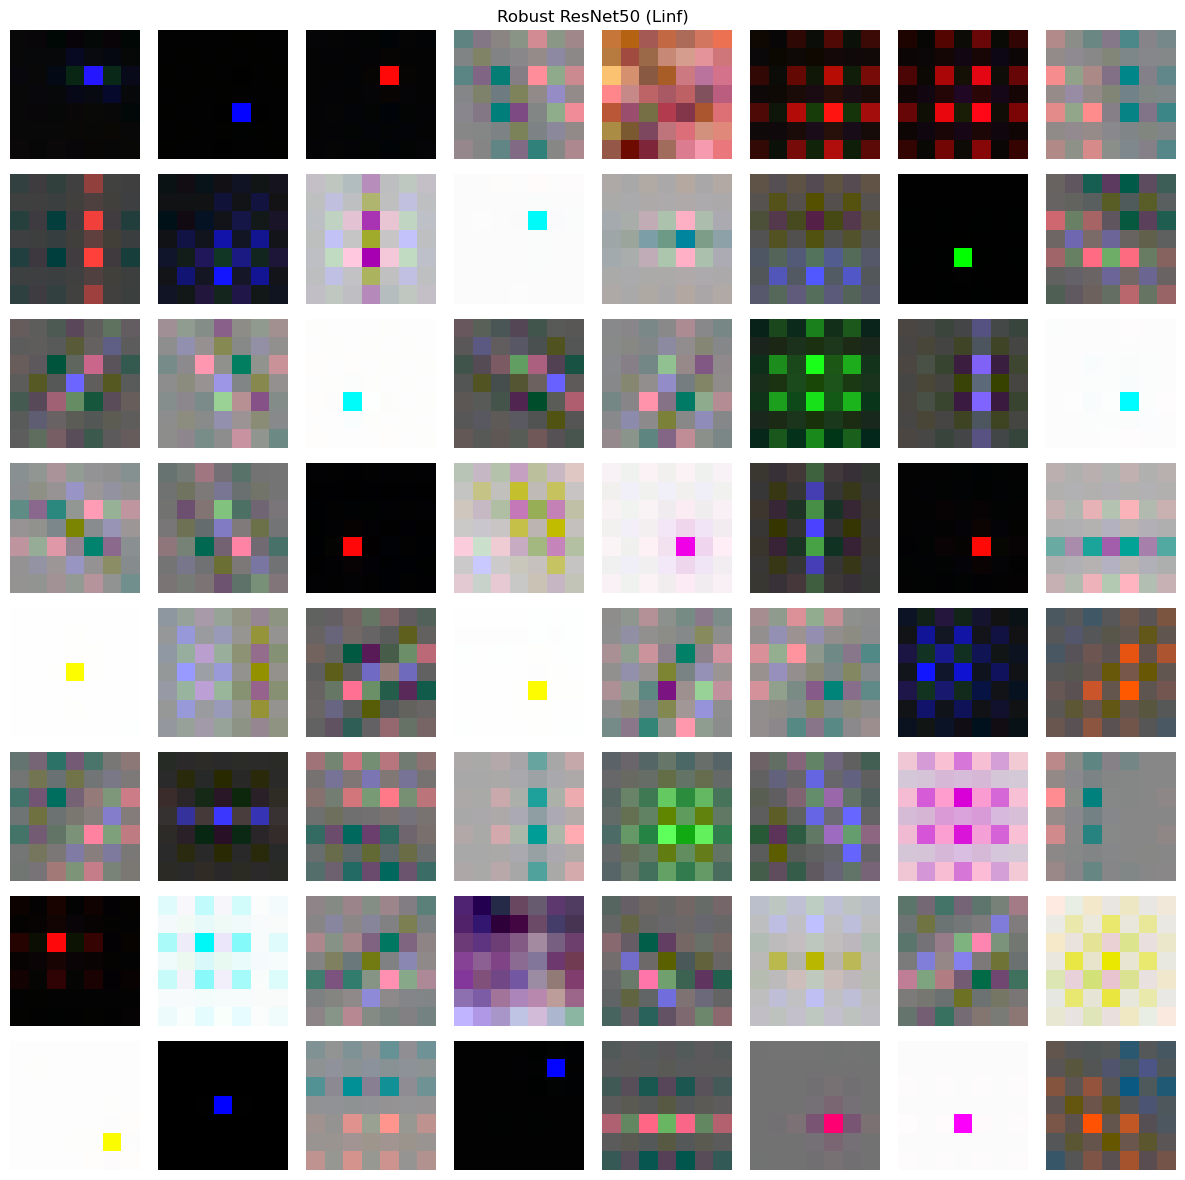

In [7]:
# Get the weights from the first conv layer
weights = robust_R50_model.conv1.weight.detach().cpu()

# Create a grid of filters
n_filters = weights.shape[0]
n_channels = weights.shape[1]
fig, axes = plt.subplots(8, 8, figsize=(12, 12))
axes = axes.ravel()

# Plot each filter
for i in range(min(n_filters, 64)):  # Plot first 64 filters
    # Get the filter
    filt = weights[i]
    # Normalize to [0,1] range for visualization
    filt = (filt - filt.min()) / (filt.max() - filt.min())
    # Plot RGB channels
    axes[i].imshow(filt.permute(1, 2, 0))
    axes[i].axis('off')
    
plt.suptitle('Robust ResNet50 (Linf)')
plt.tight_layout()
plt.show()


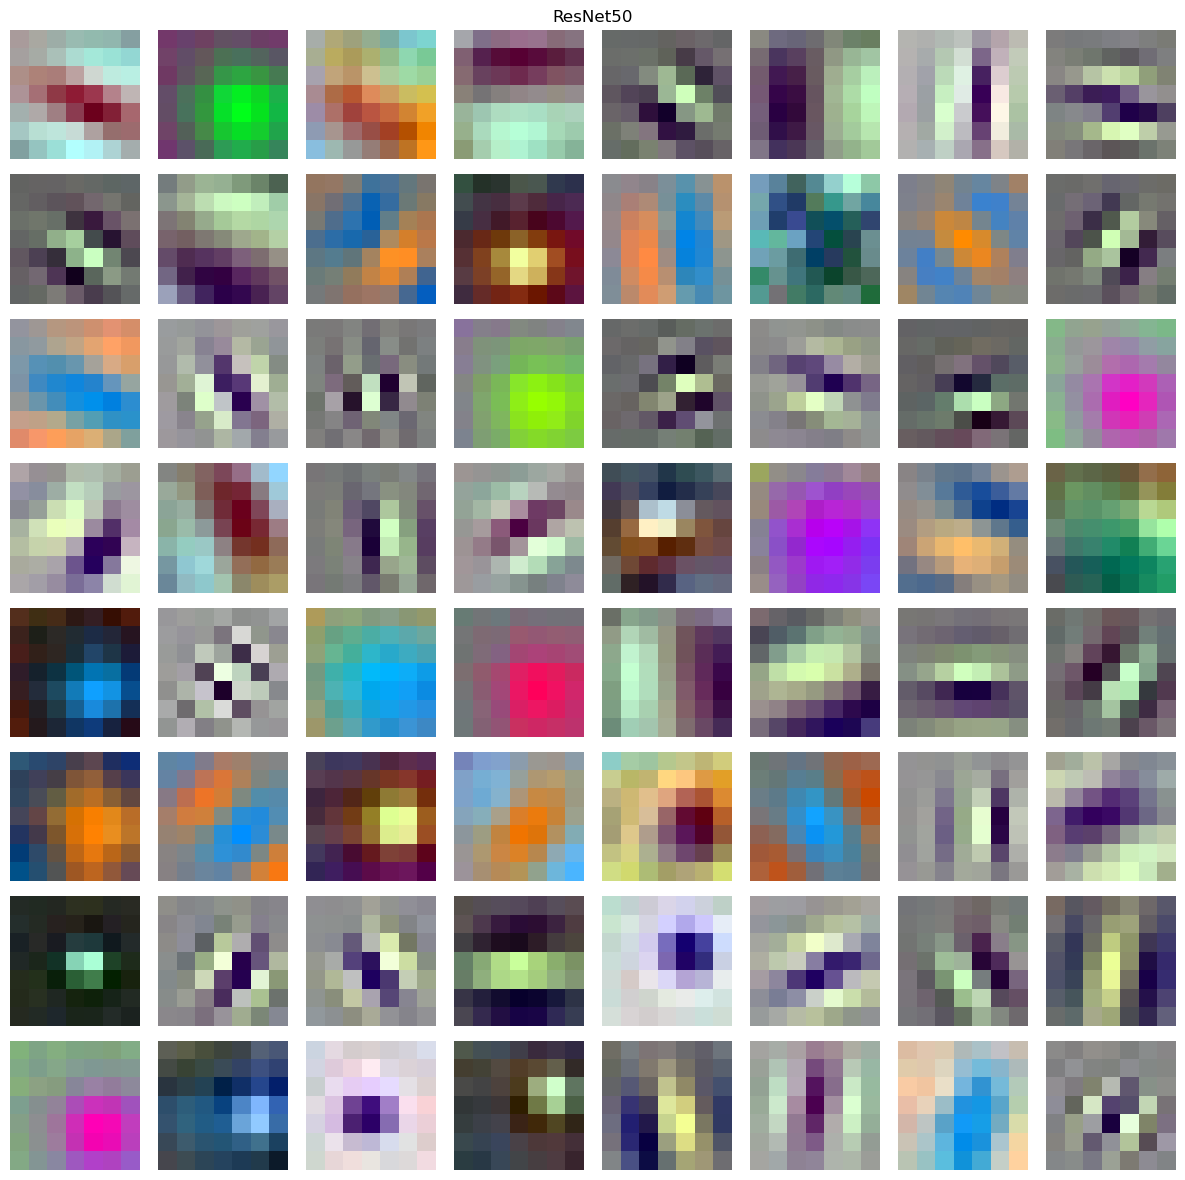

In [66]:
# Get the weights from the first conv layer
weights = R50_model.conv1.weight.detach().cpu()

# Create a grid of filters
n_filters = weights.shape[0]
n_channels = weights.shape[1]
fig, axes = plt.subplots(8, 8, figsize=(12, 12))
axes = axes.ravel()

# Plot each filter
for i in range(min(n_filters, 64)):  # Plot first 64 filters
    # Get the filter
    filt = weights[i]
    
    # Normalize to [0,1] range for visualization
    filt = (filt - filt.min()) / (filt.max() - filt.min())
    
    # Plot RGB channels
    axes[i].imshow(filt.permute(1, 2, 0))
    axes[i].axis('off')

plt.suptitle('ResNet50')
plt.tight_layout()
plt.show()


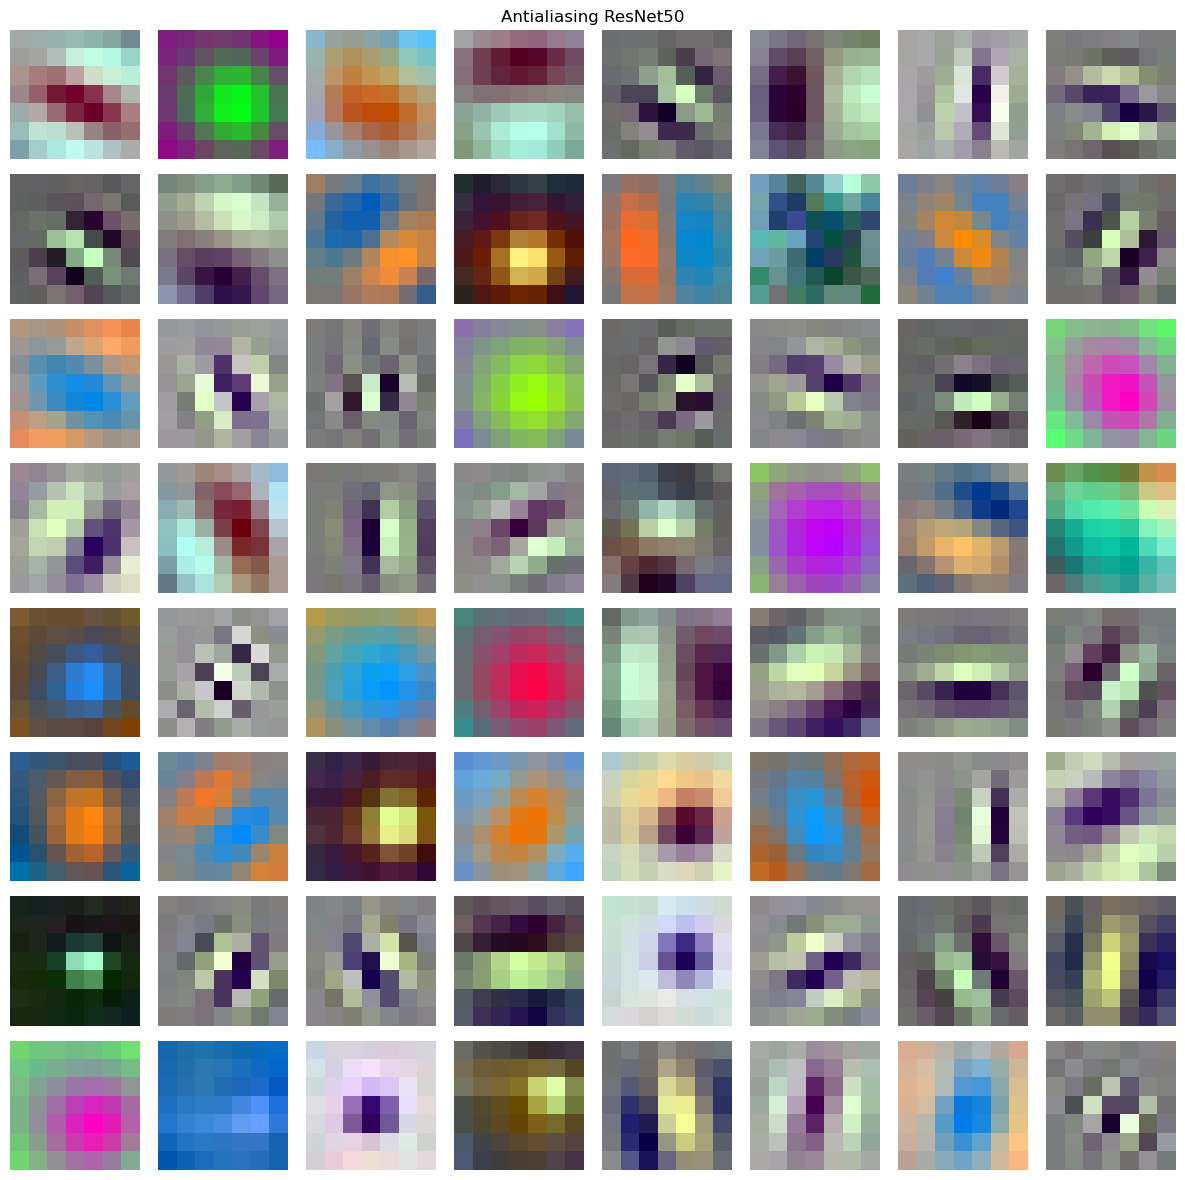

In [65]:
# Get the weights from the first conv layer
weights = model.conv1.weight.detach().cpu()

# Create a grid of filters
n_filters = weights.shape[0]
n_channels = weights.shape[1]
fig, axes = plt.subplots(8, 8, figsize=(12, 12))
axes = axes.ravel()

# Plot each filter
for i in range(min(n_filters, 64)):  # Plot first 64 filters
    # Get the filter
    filt = weights[i]
    
    # Normalize to [0,1] range for visualization
    filt = (filt - filt.min()) / (filt.max() - filt.min())
    
    # Plot RGB channels
    axes[i].imshow(filt.permute(1, 2, 0))
    axes[i].axis('off')

plt.suptitle('Antialiasing ResNet50')
plt.tight_layout()
plt.show()


### Check orthogonality of weights

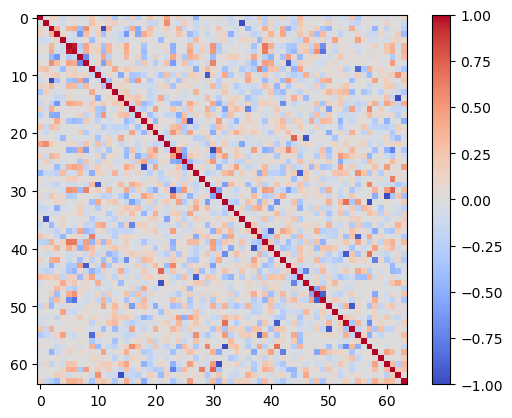

In [ ]:
import torch
# test cosine similarity
weight_mat = weights.reshape(64, -1)
weight_mat_norm = weight_mat / torch.norm(weight_mat, dim=1, keepdim=True)
weight_cosine = weight_mat_norm @ weight_mat_norm.T
plt.imshow(weight_cosine, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.show()


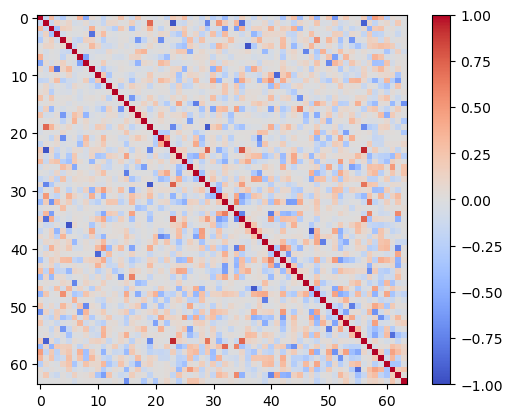

In [ ]:
weights_R50 = R50_model.conv1.weight.detach().cpu()
weights_R50 = weights_R50.reshape(64, -1)
weight_mat_norm = weights_R50 / torch.norm(weights_R50, dim=1, keepdim=True)
weight_cosine = weight_mat_norm @ weight_mat_norm.T
plt.imshow(weight_cosine, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.show()


### Download all ckpoints from robust

In [31]:
from huggingface_hub import snapshot_download

snapshot_download(
    repo_id="madrylab/robust-imagenet-models",
    revision="main",
    local_dir="/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/robust_models_checkpoints",             # where to save
    local_dir_use_symlinks=False,        # copy rather than symlink
    allow_patterns=["*.ckpt"],    # only download model files
    use_auth_token=True                  # if you’re not public-authenticated
)

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/huggingface_hub/file_download.py:1194: UserWarning: `local_dir_use_symlinks` parameter is deprecated and will be ignored. The process to download files to a local folder has been updated and do not rely on symlinks anymore. You only need to pass a destination folder as`local_dir`.
For more details, check out https://huggingface.co/docs/huggingface_hub/main/en/guides/download#download-files-to-local-folder.
  warnings.warn(


Fetching 70 files:   0%|          | 0/70 [00:00<?, ?it/s]

mobilenet_l2_eps3.ckpt:   0%|          | 0.00/28.3M [00:00<?, ?B/s]

densenet_l2_eps3.ckpt:   0%|          | 0.00/231M [00:00<?, ?B/s]

mnasnet_l2_eps0.ckpt:   0%|          | 0.00/35.4M [00:00<?, ?B/s]

mobilenet_l2_eps0.ckpt:   0%|          | 0.00/28.3M [00:00<?, ?B/s]

mnasnet_l2_eps3.ckpt:   0%|          | 0.00/35.4M [00:00<?, ?B/s]

densenet_l2_eps0.ckpt:   0%|          | 0.00/231M [00:00<?, ?B/s]

resnet18_l2_eps0.01.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_l2_eps0.03.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_l2_eps0.05.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_l2_eps0.1.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_l2_eps0.25.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_l2_eps0.5.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_l2_eps0.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_l2_eps1.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_l2_eps3.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_l2_eps5.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_linf_eps0.5.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_linf_eps0.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_linf_eps1.0.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_linf_eps2.0.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_linf_eps4.0.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet18_linf_eps8.0.ckpt:   0%|          | 0.00/93.6M [00:00<?, ?B/s]

resnet50_l2_eps0.01.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_l2_eps0.03.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_l2_eps0.05.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_l2_eps0.1.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_l2_eps0.25.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_l2_eps0.5.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_l2_eps0.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_l2_eps1.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_l2_eps3.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_l2_eps5.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_linf_eps0.5.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_linf_eps0.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_linf_eps1.0.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_linf_eps2.0.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_linf_eps4.0.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnet50_linf_eps8.0.ckpt:   0%|          | 0.00/205M [00:00<?, ?B/s]

resnext50_32x4d_l2_eps0.ckpt:   0%|          | 0.00/201M [00:00<?, ?B/s]

resnext50_32x4d_l2_eps3.ckpt:   0%|          | 0.00/201M [00:00<?, ?B/s]

shufflenet_l2_eps0.ckpt:   0%|          | 0.00/18.5M [00:00<?, ?B/s]

shufflenet_l2_eps3.ckpt:   0%|          | 0.00/18.5M [00:00<?, ?B/s]

vgg16_bn_l2_eps0.ckpt:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

vgg16_bn_l2_eps3.ckpt:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

wide_resnet50_2_l2_eps0.01.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_l2_eps0.03.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_l2_eps0.05.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_l2_eps0.1.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_l2_eps0.25.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_l2_eps0.5.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_l2_eps0.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_l2_eps1.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_l2_eps3.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_l2_eps5.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_linf_eps0.5.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_linf_eps0.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_linf_eps1.0.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_linf_eps2.0.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_linf_eps4.0.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_2_linf_eps8.0.ckpt:   0%|          | 0.00/551M [00:00<?, ?B/s]

wide_resnet50_4_l2_eps0.01.ckpt:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

wide_resnet50_4_l2_eps0.03.ckpt:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

wide_resnet50_4_l2_eps0.05.ckpt:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

wide_resnet50_4_l2_eps0.1.ckpt:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

wide_resnet50_4_l2_eps0.25.ckpt:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

wide_resnet50_4_l2_eps0.5.ckpt:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

wide_resnet50_4_l2_eps0.ckpt:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

wide_resnet50_4_l2_eps1.ckpt:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

wide_resnet50_4_l2_eps3.ckpt:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

wide_resnet50_4_l2_eps5.ckpt:   0%|          | 0.00/1.79G [00:00<?, ?B/s]

'/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/robust_models_checkpoints'

In [3]:
from collections import OrderedDict
def load_pruned_ckpt(ckpt_name):
    ckpt_root = r"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/robust_models_checkpoints"
    ckpt_data = torch.load(f'{ckpt_root}/{ckpt_name}.ckpt')  
    ckpt_prune = prune_ckpt(ckpt_data)
    return ckpt_prune

def prune_ckpt(ckpt_data):
    ckpt_prune = OrderedDict()
    for key, value in ckpt_data["model"].items():
        if 'module.model.' in key:
            newkey = key.replace('module.model.', '')
            ckpt_prune[newkey] = value
    return ckpt_prune

def load_robust_model(ckpt_name):
    ckpt_prune = load_pruned_ckpt(ckpt_name)
    model, transform = load_model_transform('resnet50')
    model.load_state_dict(ckpt_prune)
    model.eval().cuda()
    model.requires_grad_(False)
    return model, transform


In [4]:
def visualize_filters(weights, title):
    # Create a grid of filters
    n_filters = weights.shape[0]
    n_channels = weights.shape[1]
    fig, axes = plt.subplots(8, 8, figsize=(12, 12))
    axes = axes.ravel()

    # Plot each filter
    for i in range(min(n_filters, 64)):  # Plot first 64 filters
        # Get the filter
        filt = weights[i]
        
        # Normalize to [0,1] range for visualization
        filt = (filt - filt.min()) / (filt.max() - filt.min())
        
        # Plot RGB channels
        axes[i].imshow(filt.permute(1, 2, 0))
        axes[i].axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


### L2 robust models

In [1]:
!wget https://huggingface.co/madrylab/robust-imagenet-models/resolve/main/resnet50_l2_eps5.ckpt -P checkpoints/

--2025-05-27 16:06:05--  https://huggingface.co/madrylab/robust-imagenet-models/resolve/main/resnet50_l2_eps5.ckpt
Resolving huggingface.co (huggingface.co)... 18.161.21.41, 18.161.21.44, 18.161.21.22, ...
Connecting to huggingface.co (huggingface.co)|18.161.21.41|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/8f/a2/8fa29f483f6b3cadc7a5fa05e2646938d6a444b60ecebf5e5285457f6ffb8f1d/c50db4bbd9a61bc0e0a33290e1f07a79080e16489aa5ada869efc88306f497be?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27resnet50_l2_eps5.ckpt%3B+filename%3D%22resnet50_l2_eps5.ckpt%22%3B&Expires=1748379965&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0ODM3OTk2NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy84Zi9hMi84ZmEyOWY0ODNmNmIzY2FkYzdhNWZhMDVlMjY0NjkzOGQ2YTQ0NGI2MGVjZWJmNWU1Mjg1NDU3ZjZmZmI4ZjFkL2M1MGRiNGJiZDlhNjFiYzBlMGEzMzI5MGUxZjA3YTc5MDgwZTE2NDg5YWE1YWRhODY5ZWZjODgzMDZmNDk3YmU%7EcmV

In [19]:
import sys
sys.path.append('/n/home12/binxuwang/Github/Closed-loop-visual-insilico')
import torch
from core.model_load_utils import load_model_transform
R50_model_L2rbst, R50_transform = load_model_transform('resnet50')

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
import matplotlib.pyplot as plt

In [12]:
from collections import OrderedDict
ckpt_data = torch.load('checkpoints/resnet50_l2_eps5.ckpt')  
ckpt_prune = OrderedDict()
for key, value in ckpt_data["model"].items():
    if 'module.model.' in key:
        newkey = key.replace('module.model.', '')
        ckpt_prune[newkey] = value

In [20]:
R50_model_L2rbst.load_state_dict(ckpt_prune)
R50_model_L2rbst.eval().cuda()
R50_model_L2rbst.requires_grad_(False)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

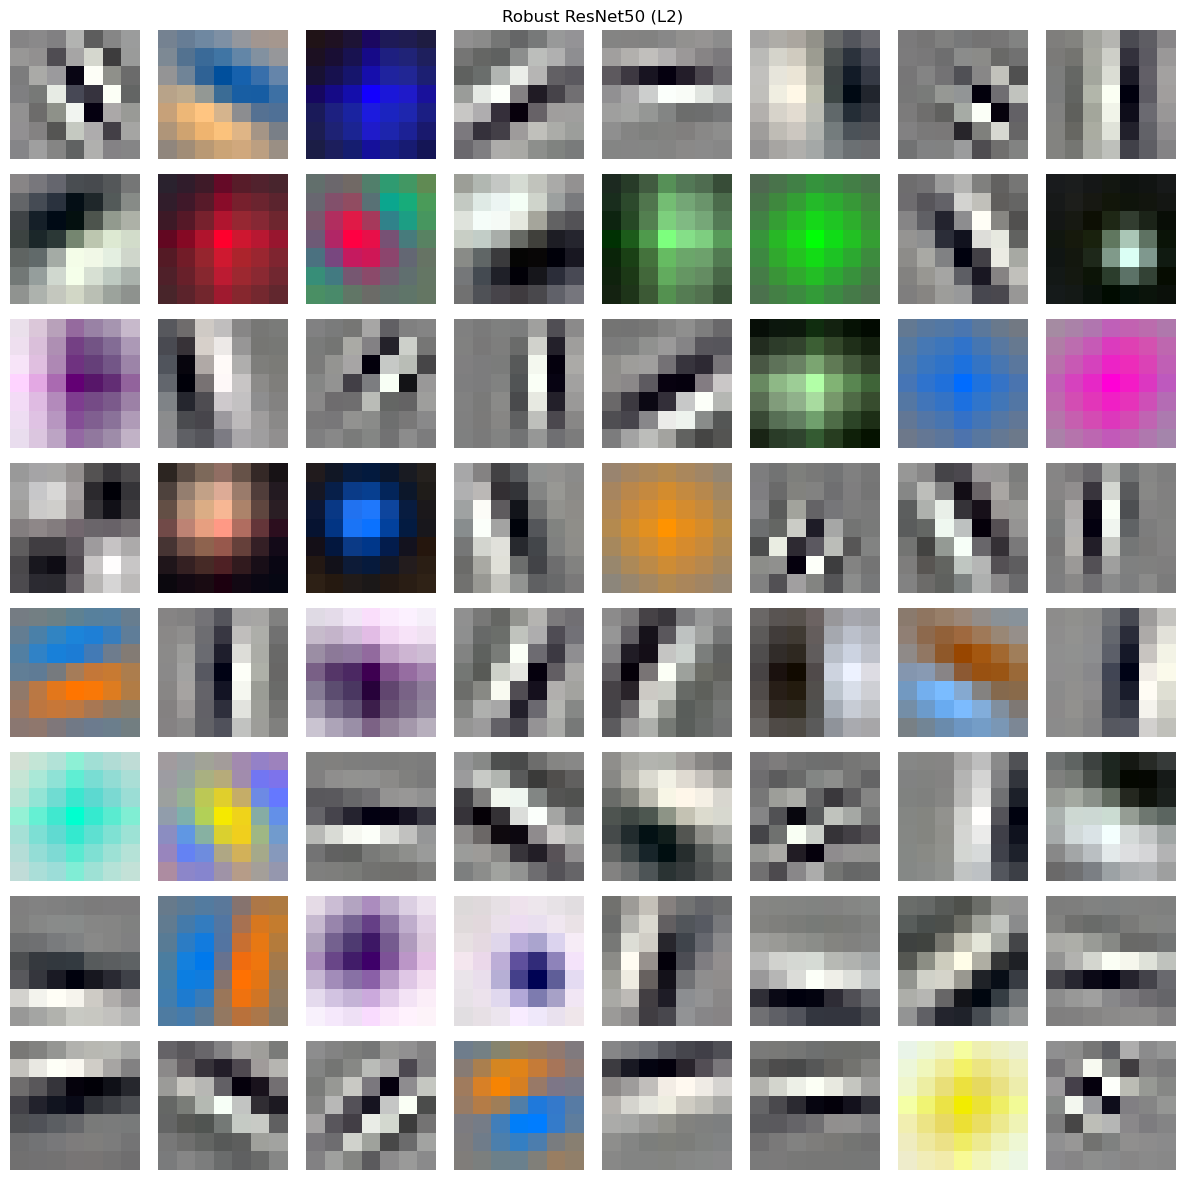

In [17]:
# Get the weights from the first conv layer
weights = R50_model.conv1.weight.detach().cpu()

# Create a grid of filters
n_filters = weights.shape[0]
n_channels = weights.shape[1]
fig, axes = plt.subplots(8, 8, figsize=(12, 12))
axes = axes.ravel()

# Plot each filter
for i in range(min(n_filters, 64)):  # Plot first 64 filters
    # Get the filter
    filt = weights[i]
    
    # Normalize to [0,1] range for visualization
    filt = (filt - filt.min()) / (filt.max() - filt.min())
    
    # Plot RGB channels
    axes[i].imshow(filt.permute(1, 2, 0))
    axes[i].axis('off')

plt.suptitle('Robust ResNet50 (L2)')
plt.tight_layout()
plt.show()


In [28]:
from horama import maco, plot_maco
from pprint import pprint
def objective_anti_alias(img):
    return R50_model_L2rbst(normalizer(img))[:,1].mean()

In [29]:
from torchvision import transforms as T
normalizer = T.Compose([
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    T.Resize([224,224])
])

100%|██████████| 500/500 [00:05<00:00, 98.46it/s]


{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.01,
 'total_steps': 500,
 'values_range': (0, 1)}


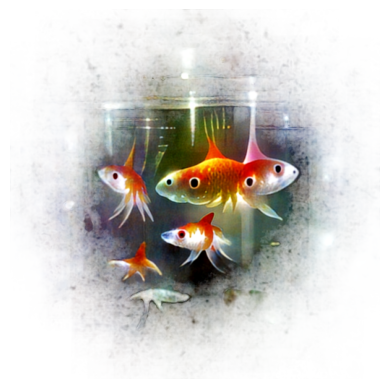

In [30]:
maco_hyperparams = dict(total_steps=500, learning_rate=0.5, image_size=512,
        model_input_size=224, noise=0.01, values_range=(0, 1),
        crops_per_iteration=2, box_size=(0.20, 0.25),)
image1, alpha1 = maco(objective_anti_alias, **maco_hyperparams, device='cuda')
pprint(maco_hyperparams)
plot_maco(image1, alpha1)
plt.show()

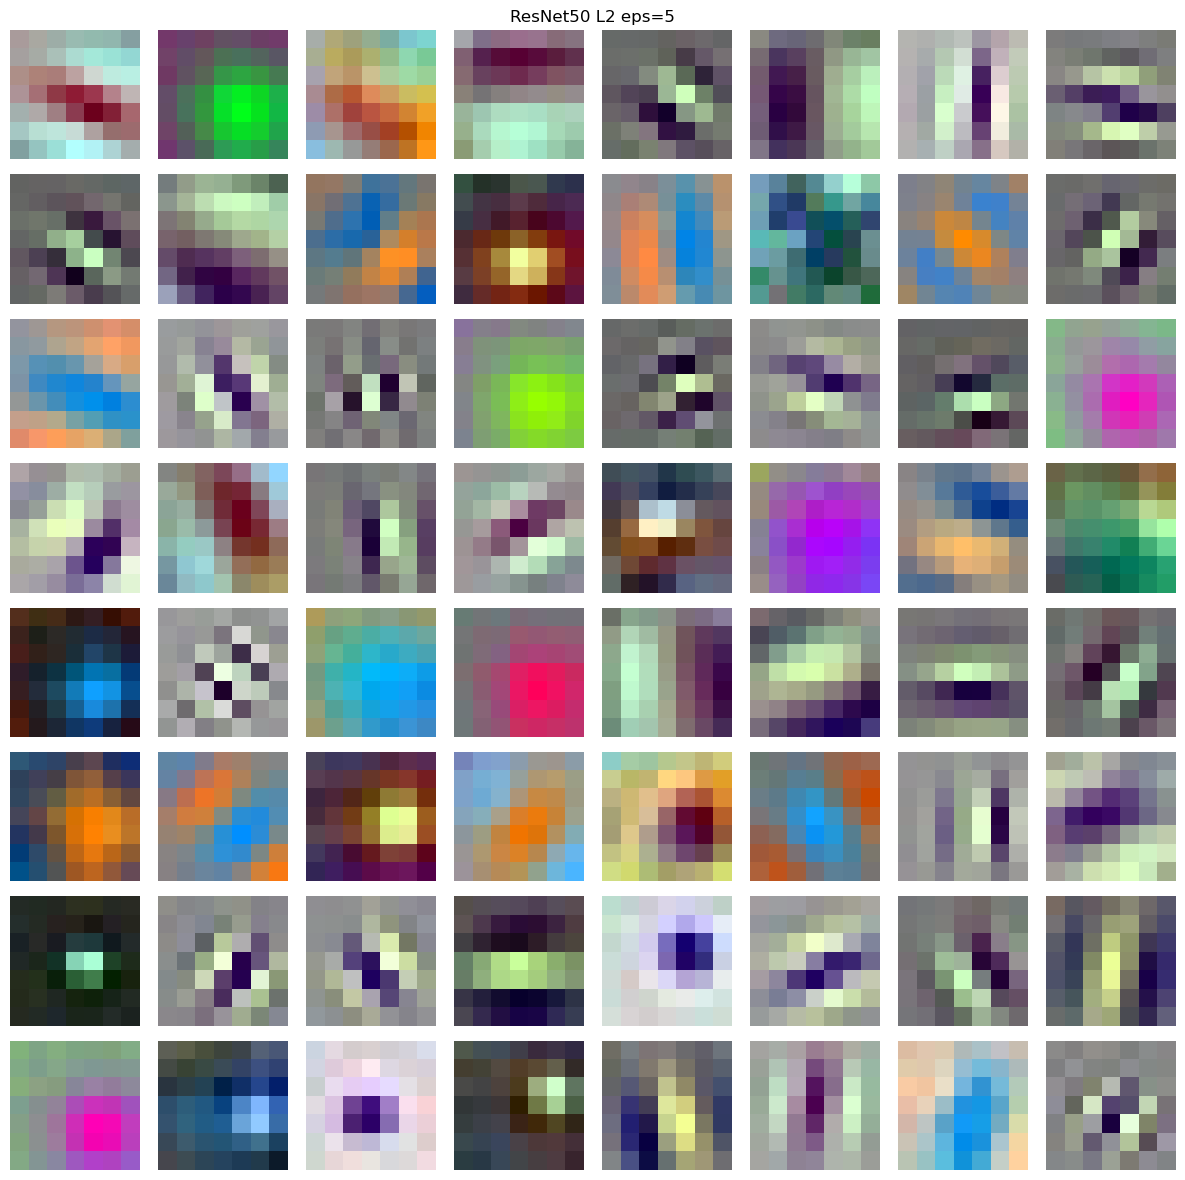

In [33]:
# Get the weights from the first conv layer
weights = R50_model.conv1.weight.detach().cpu()
visualize_filters(R50_model.conv1.weight.detach().cpu(), 'ResNet50 L2 eps=5')

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


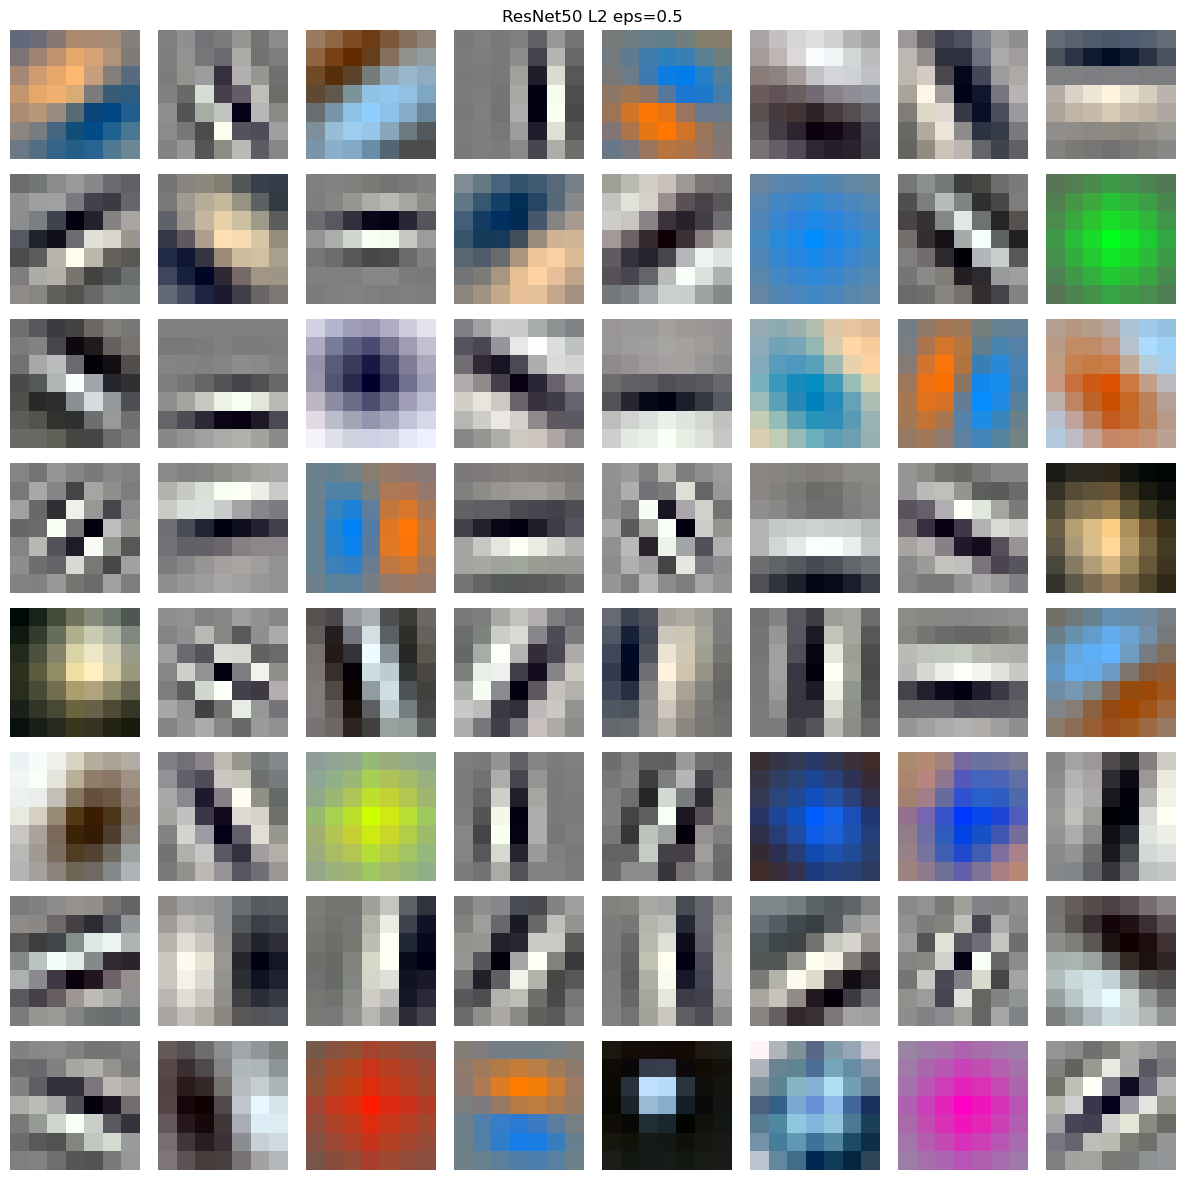

In [35]:
robust_model, robust_transform = load_robust_model('resnet50_l2_eps0.5')
visualize_filters(robust_model.conv1.weight.detach().cpu(), 'ResNet50 L2 eps=0.5')

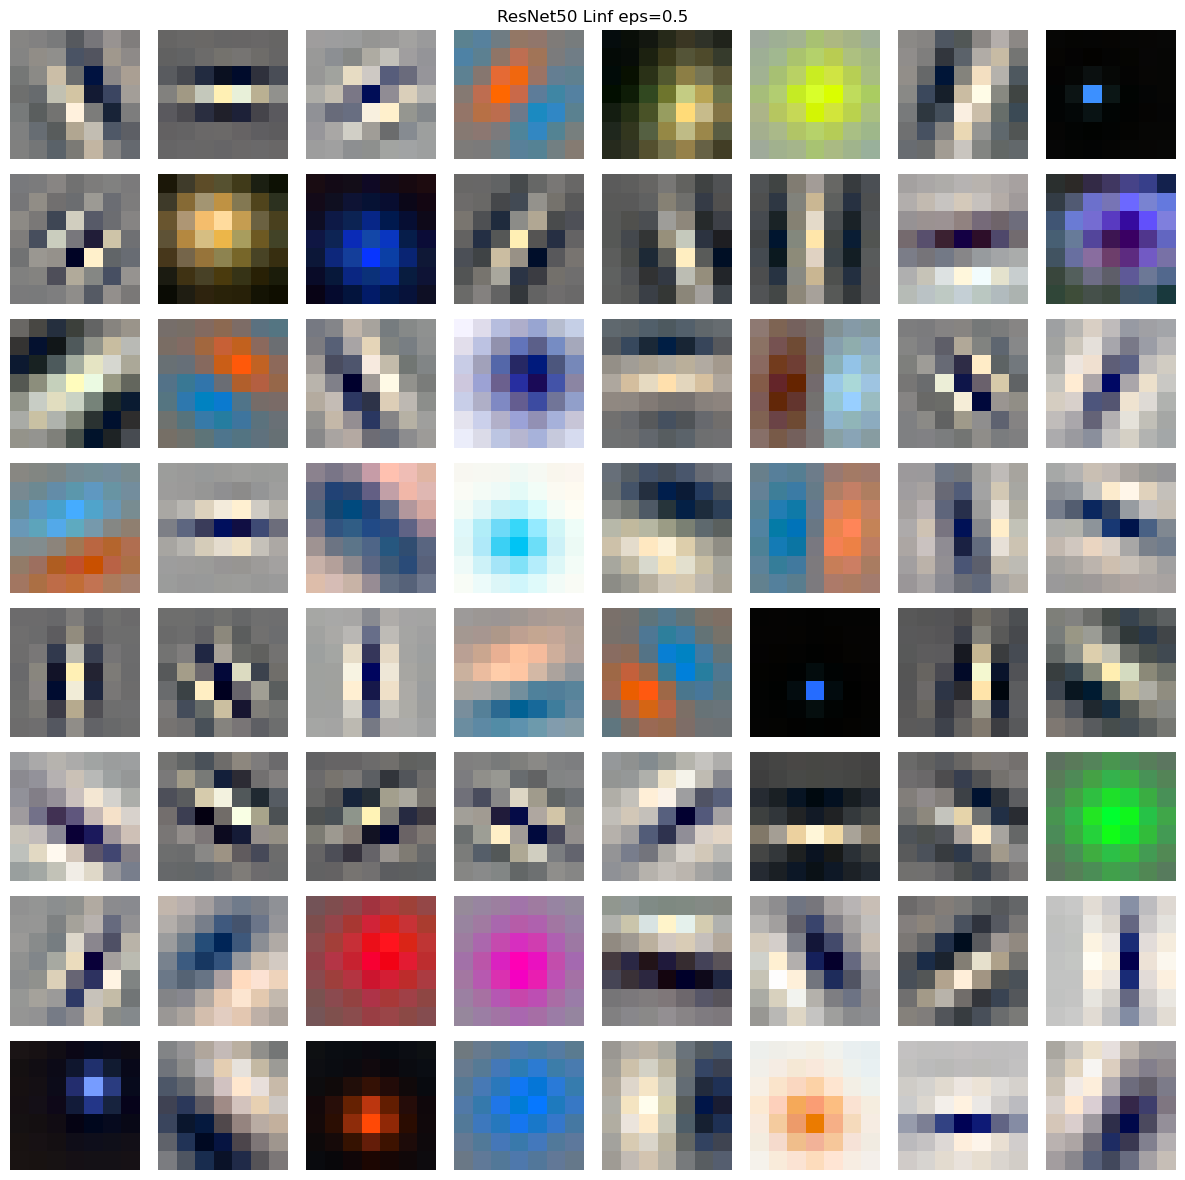

In [36]:
robust_model, robust_transform = load_robust_model('resnet50_linf_eps0.5')
visualize_filters(robust_model.conv1.weight.detach().cpu(), 'ResNet50 Linf eps=0.5')

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


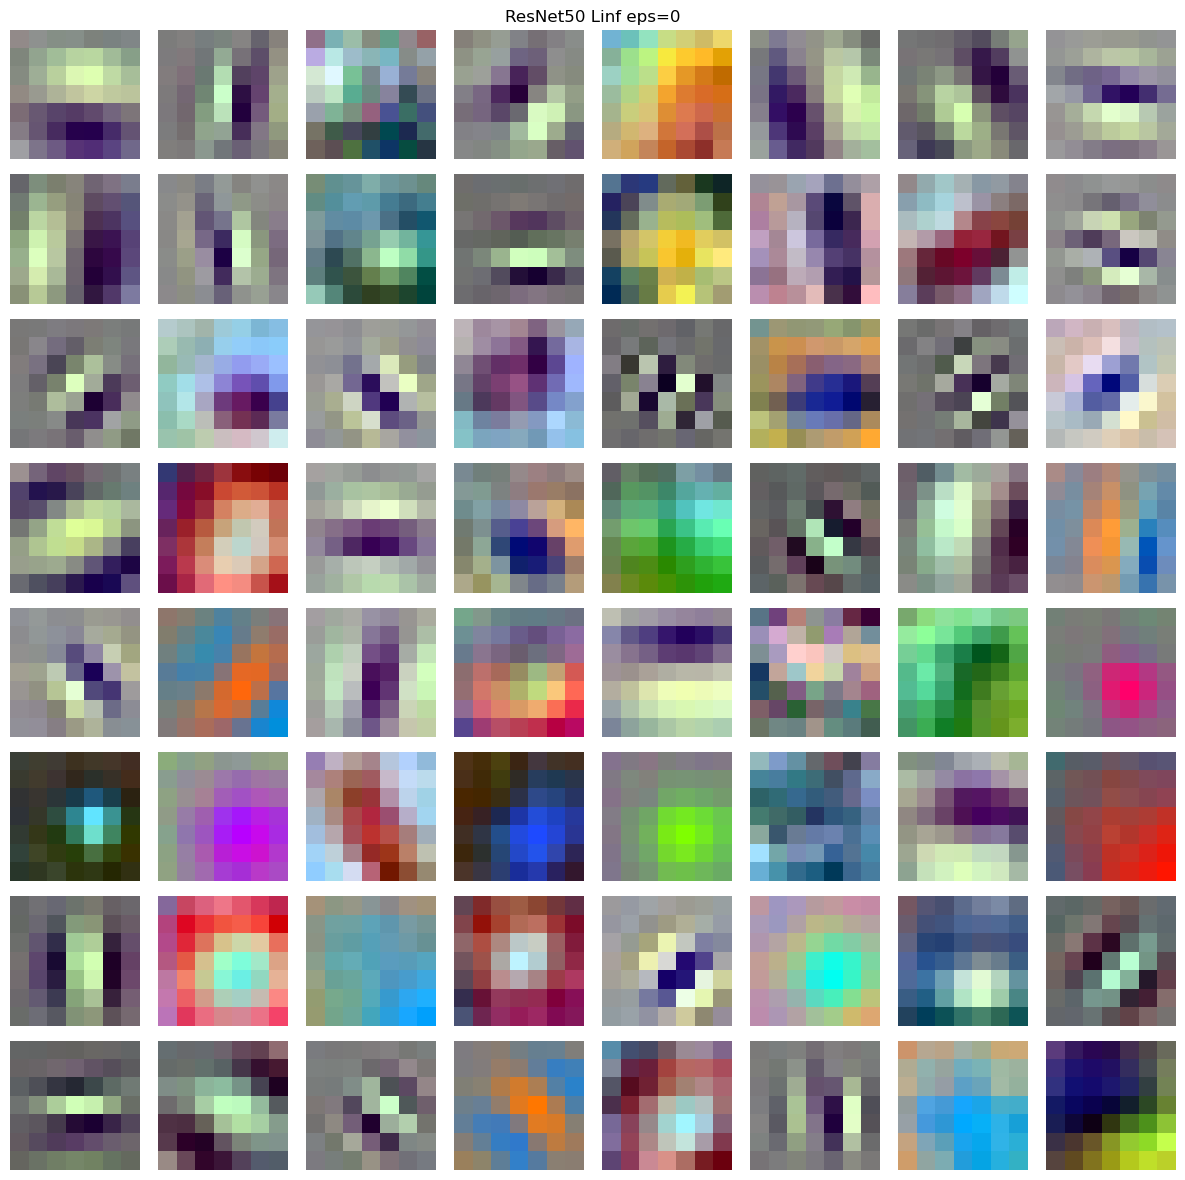

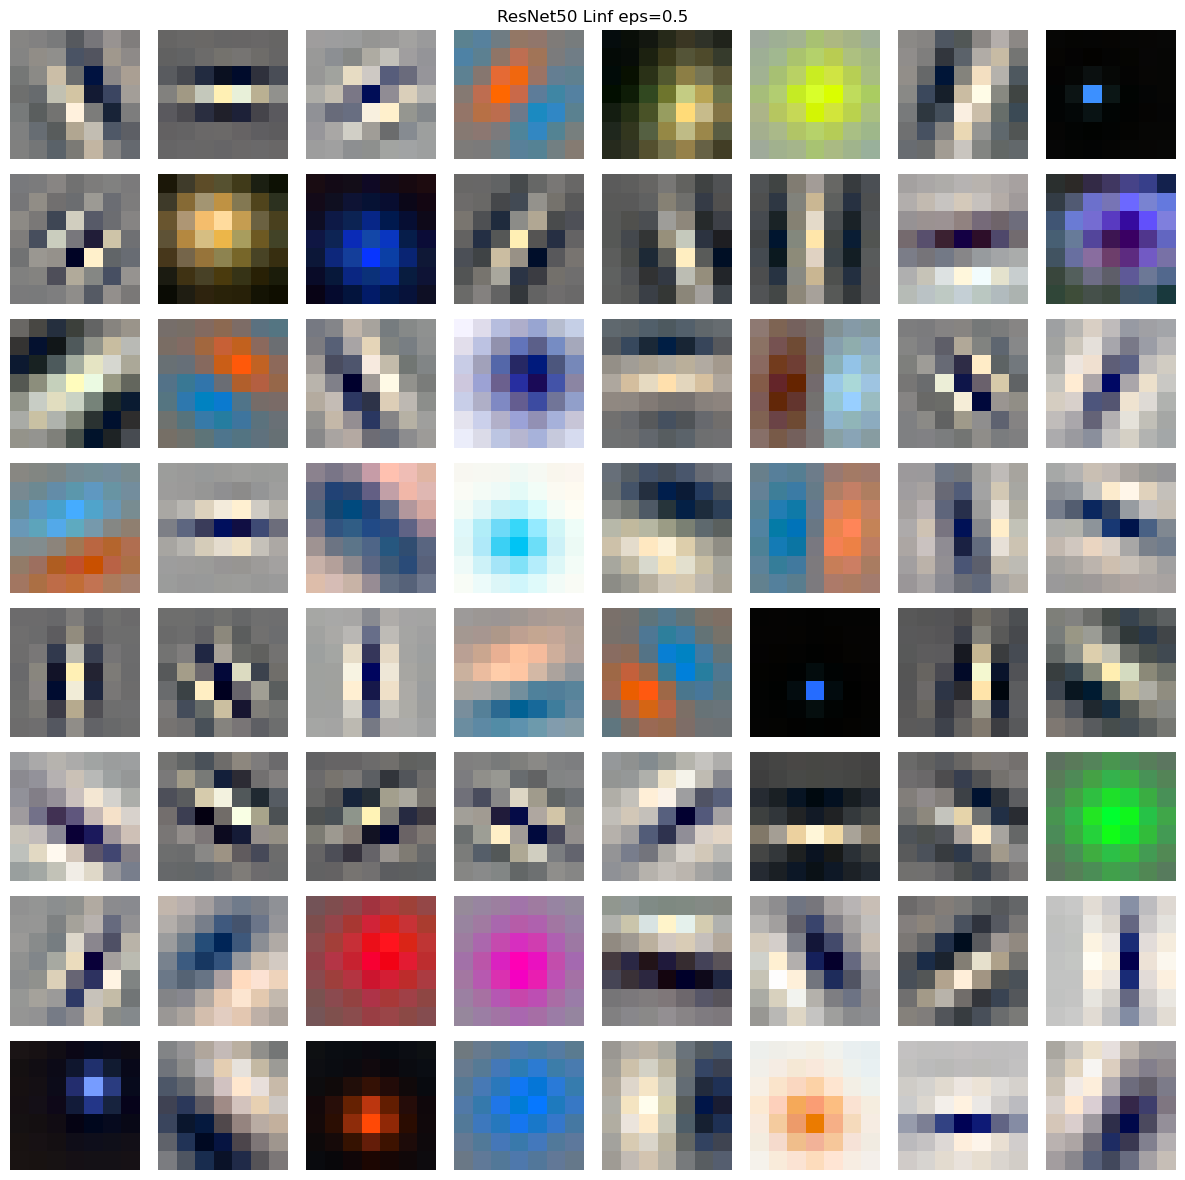

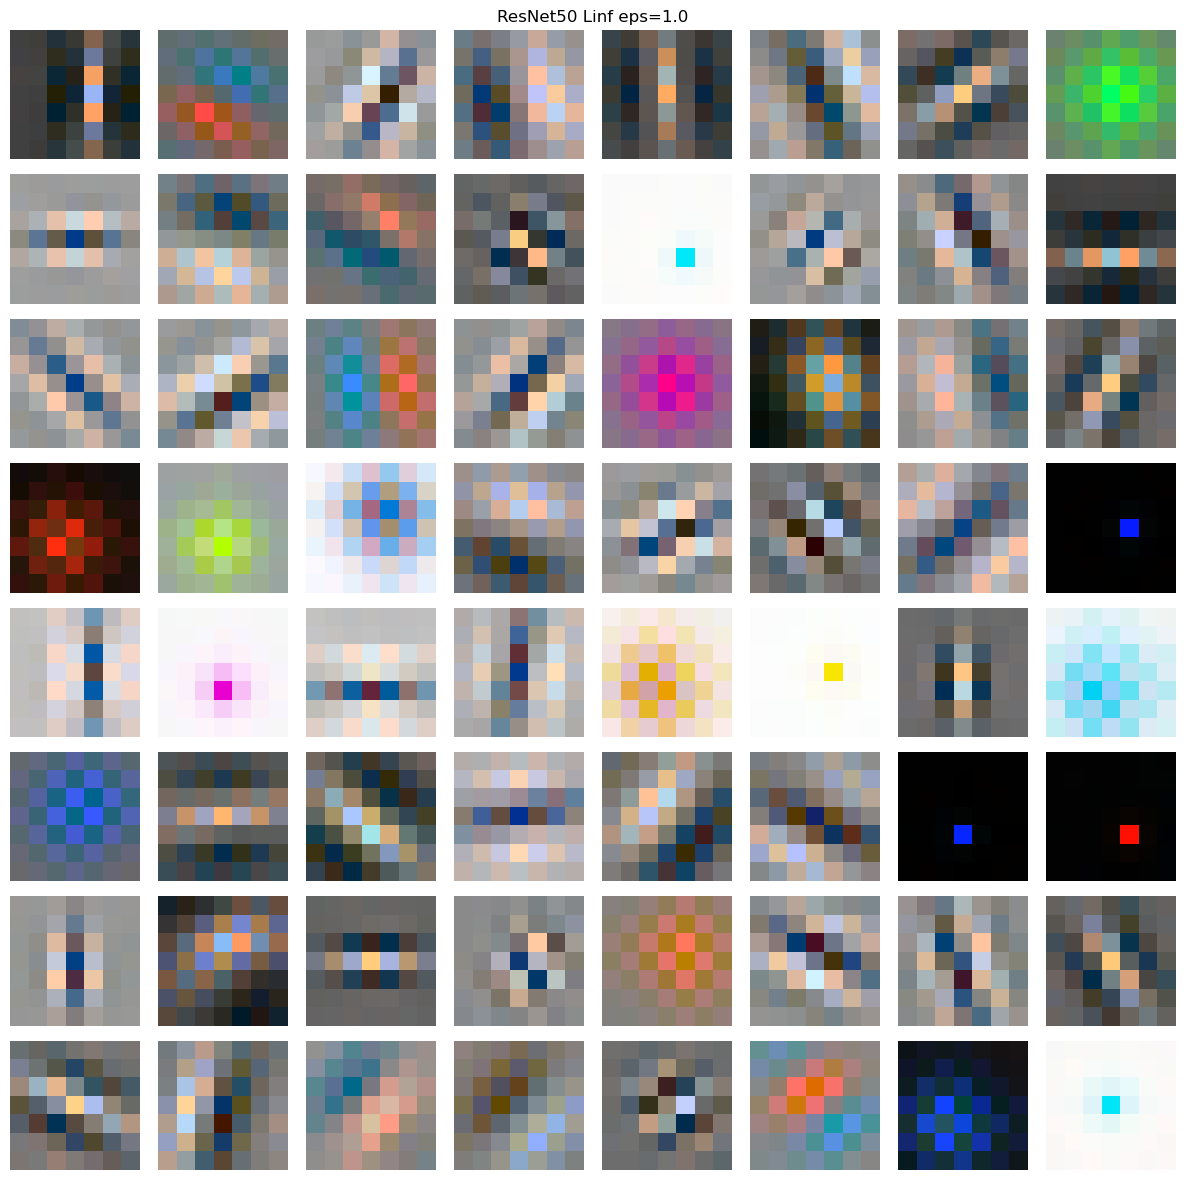

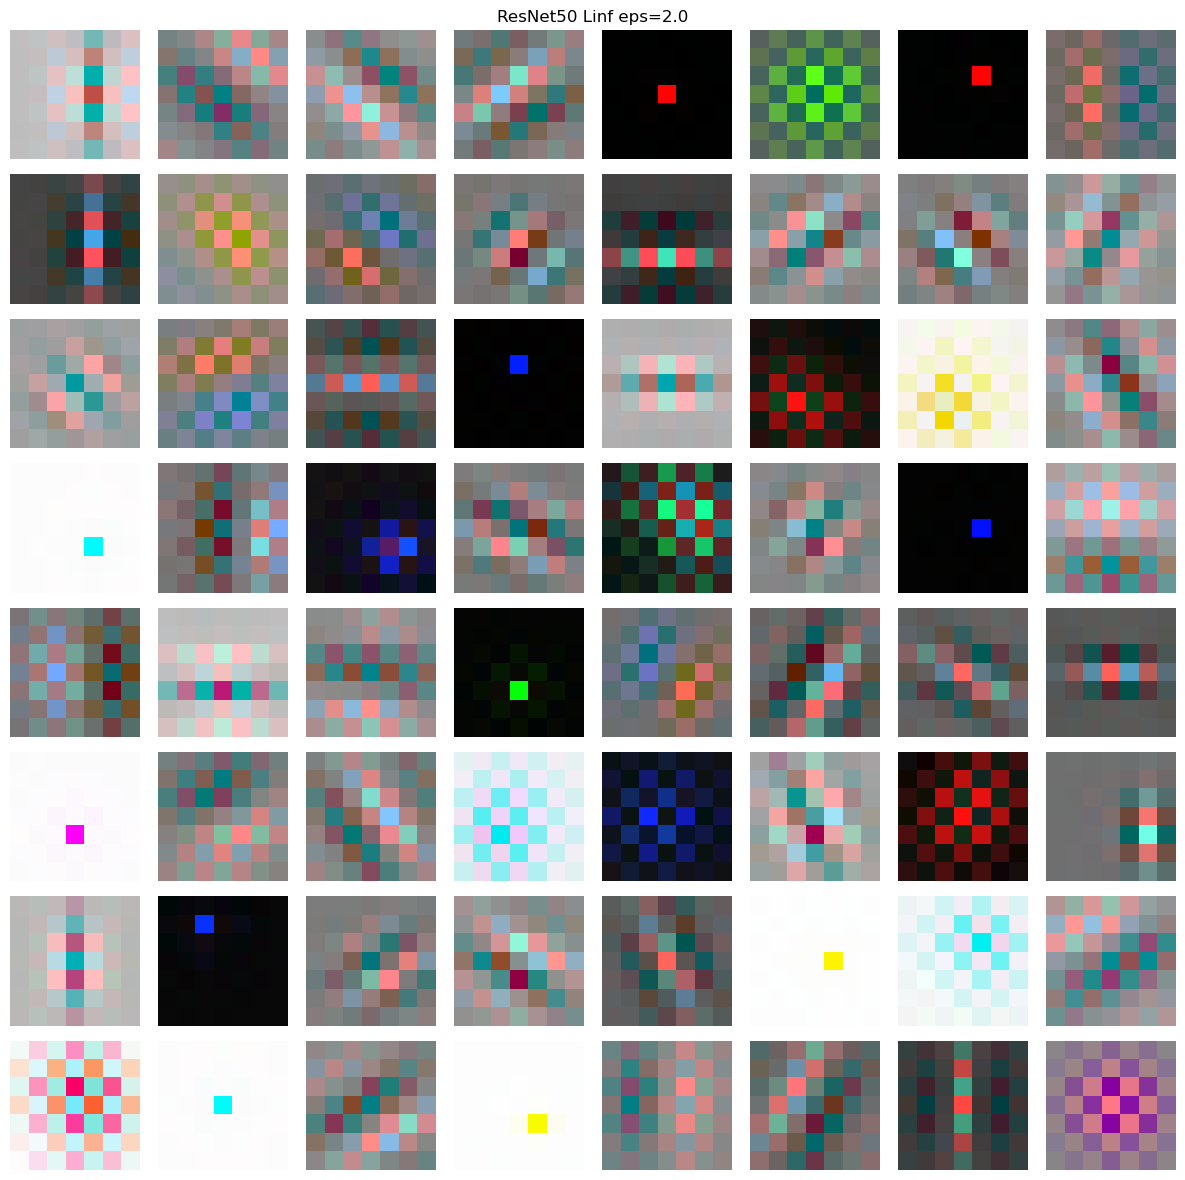

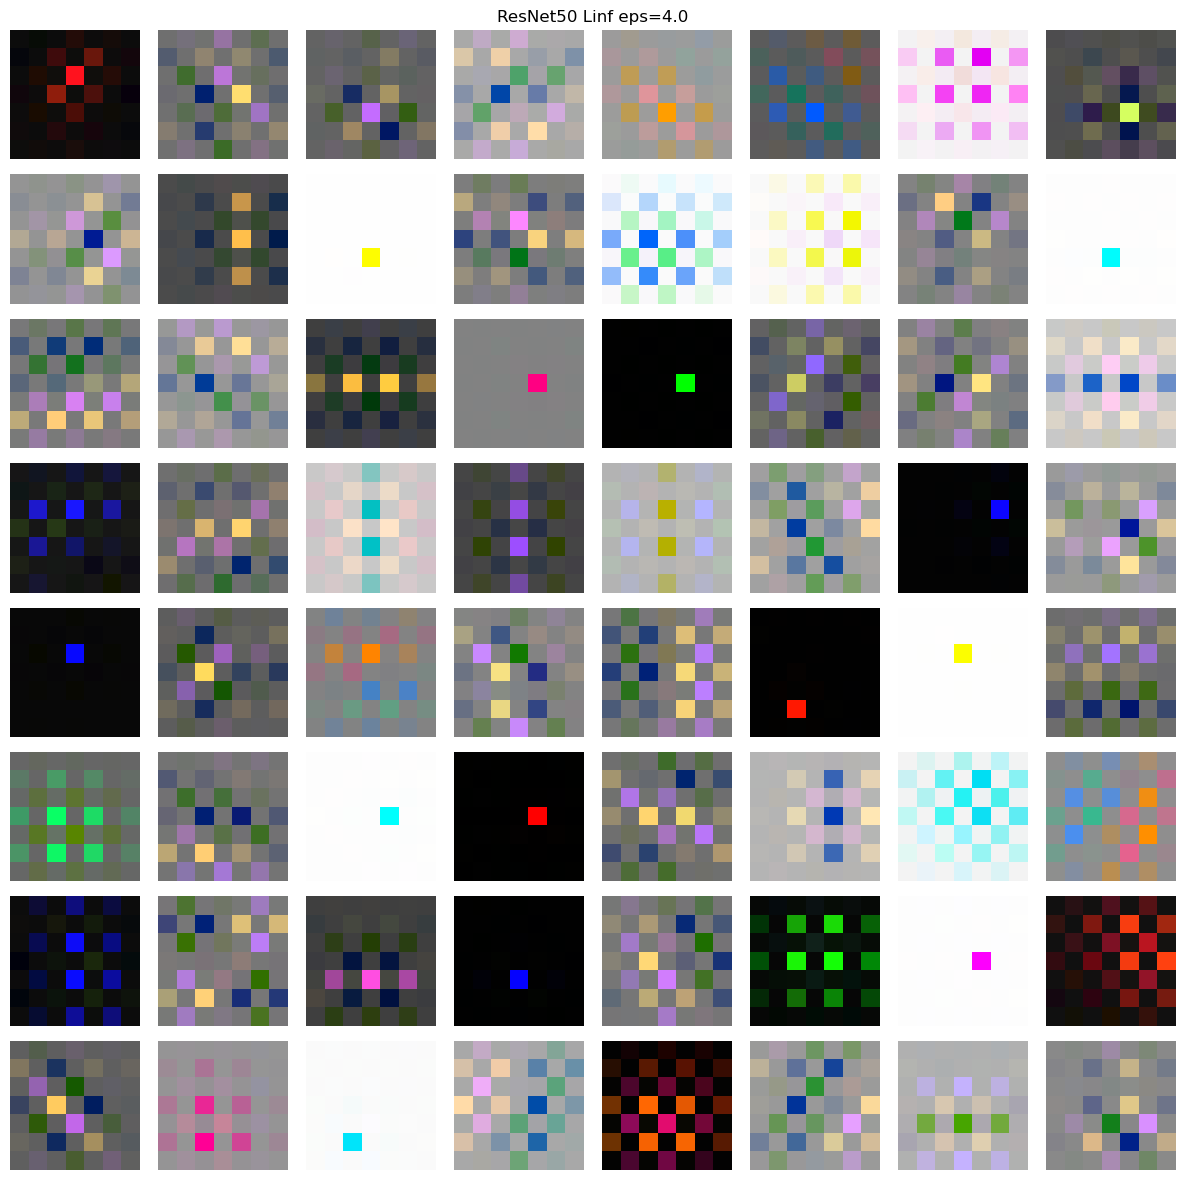

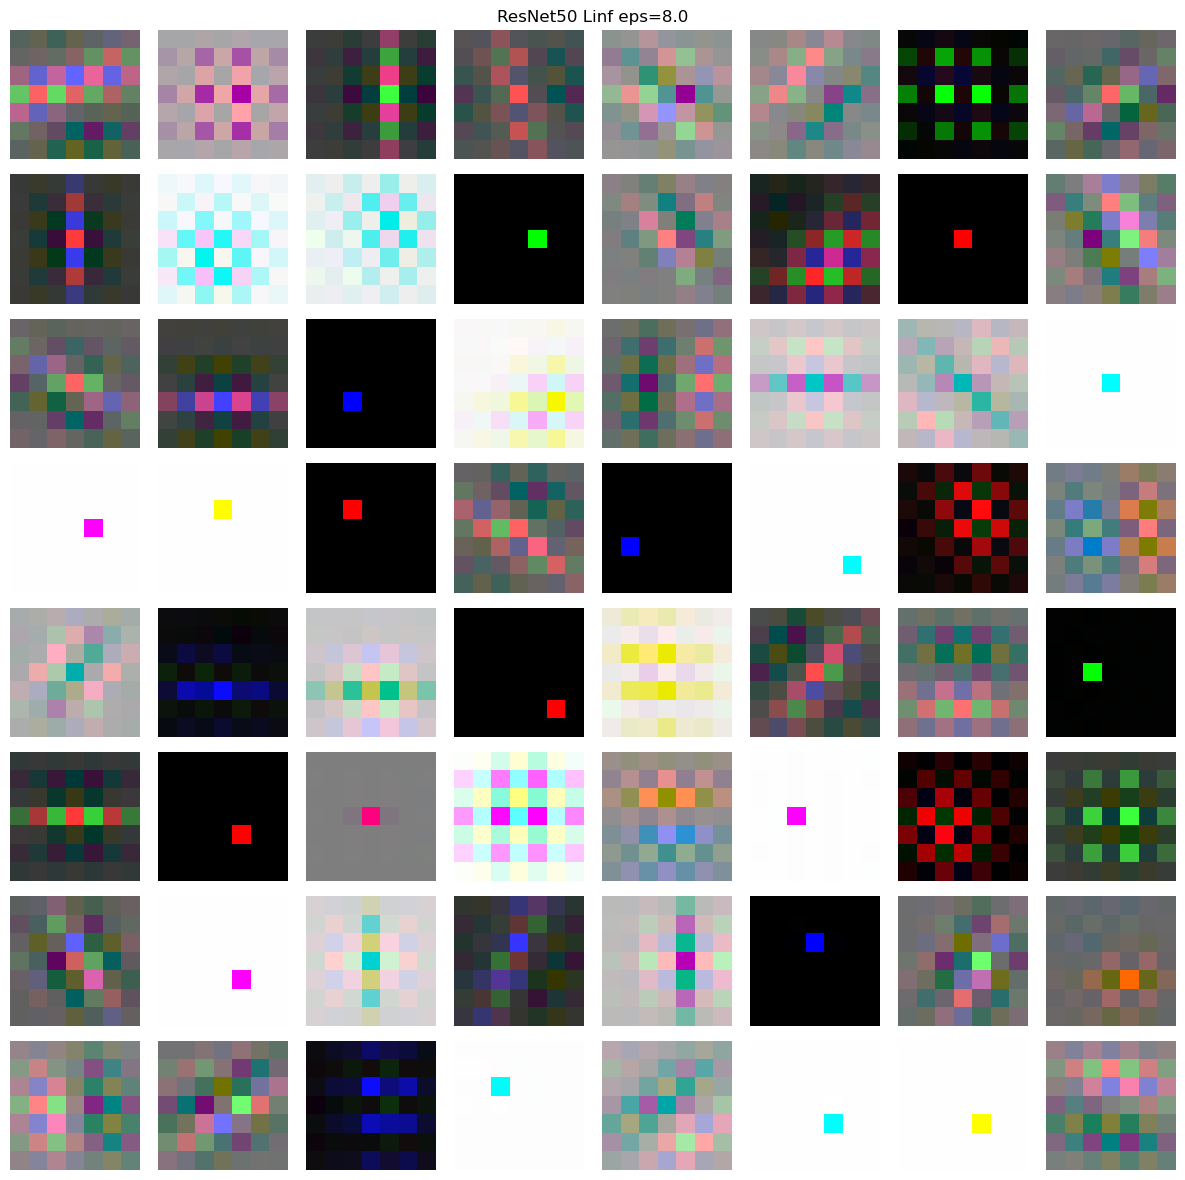

In [37]:
for eps in [0, 0.5, 1.0, 2.0, 4.0, 8.0]:
    robust_model, robust_transform = load_robust_model(f'resnet50_linf_eps{eps}')
    visualize_filters(robust_model.conv1.weight.detach().cpu(), f'ResNet50 Linf eps={eps}')

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


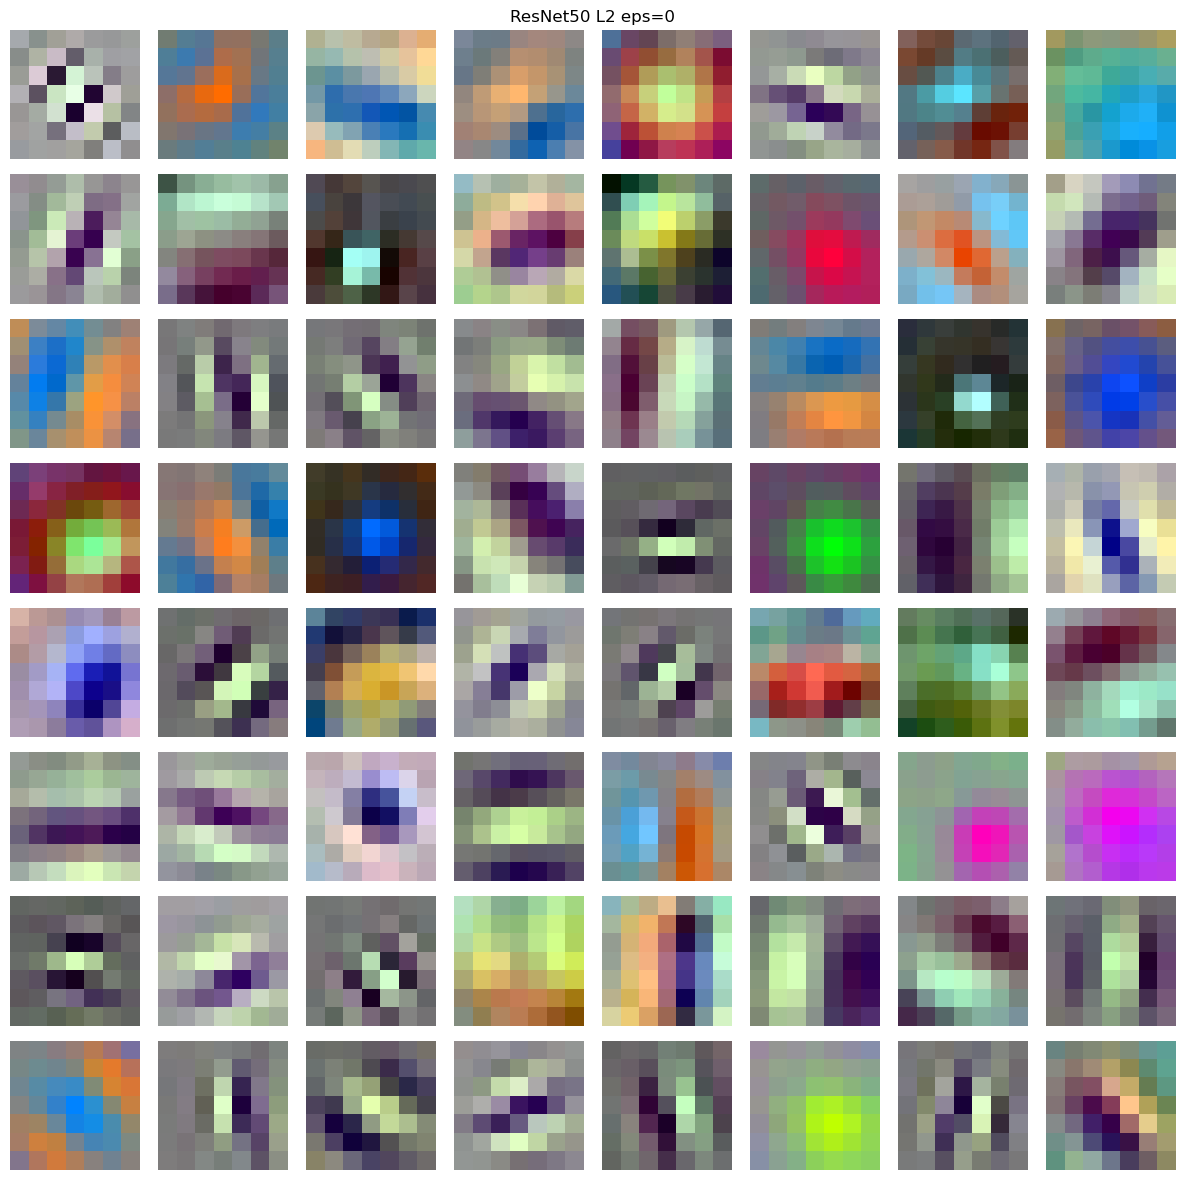

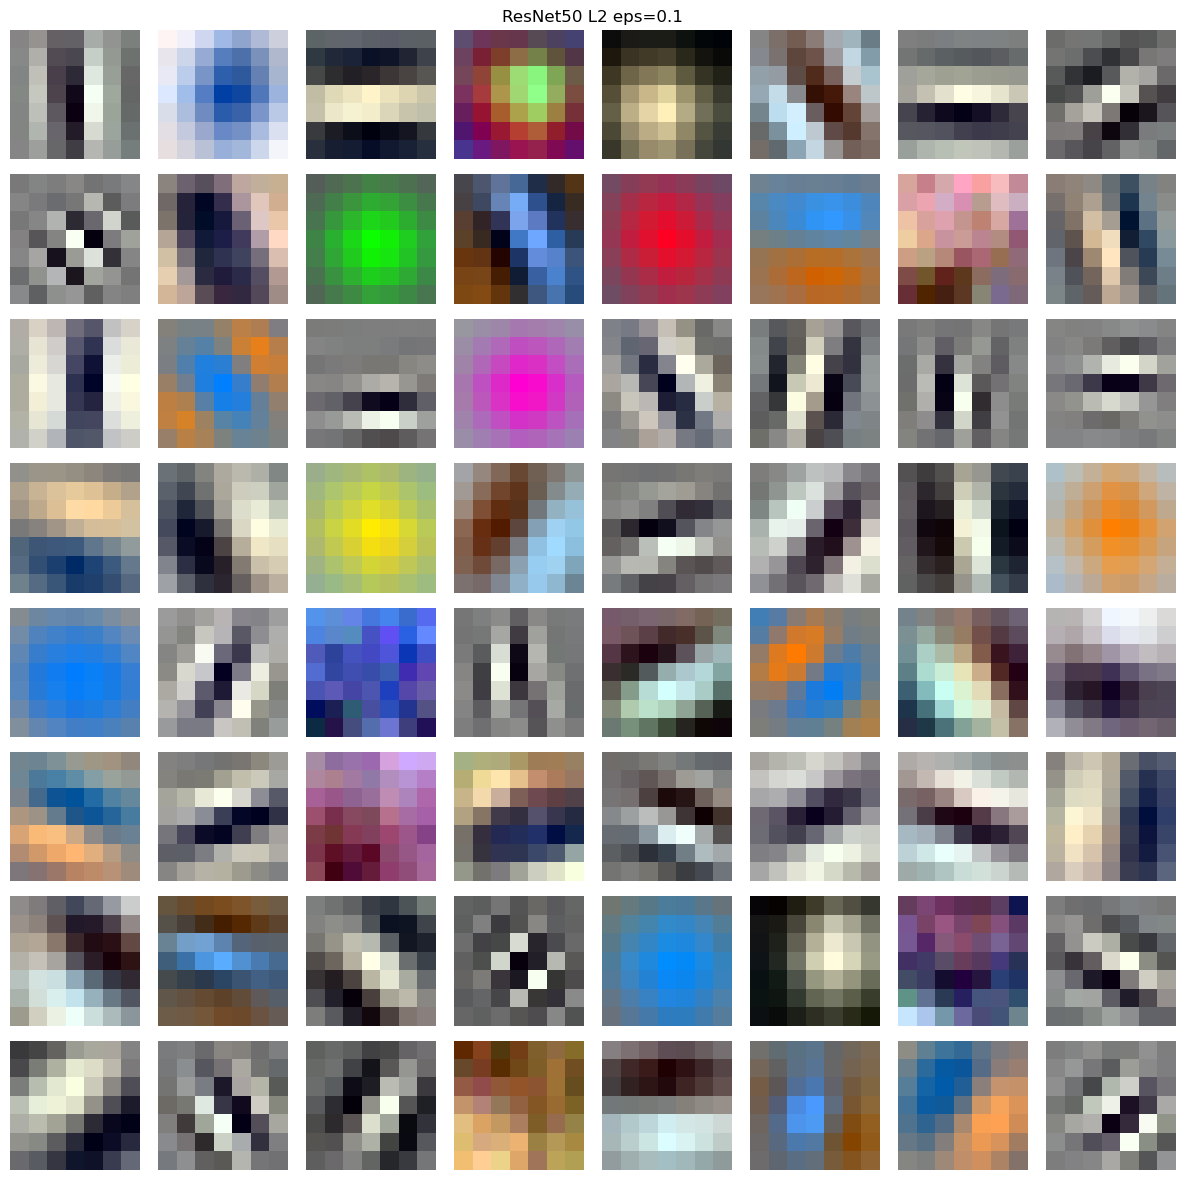

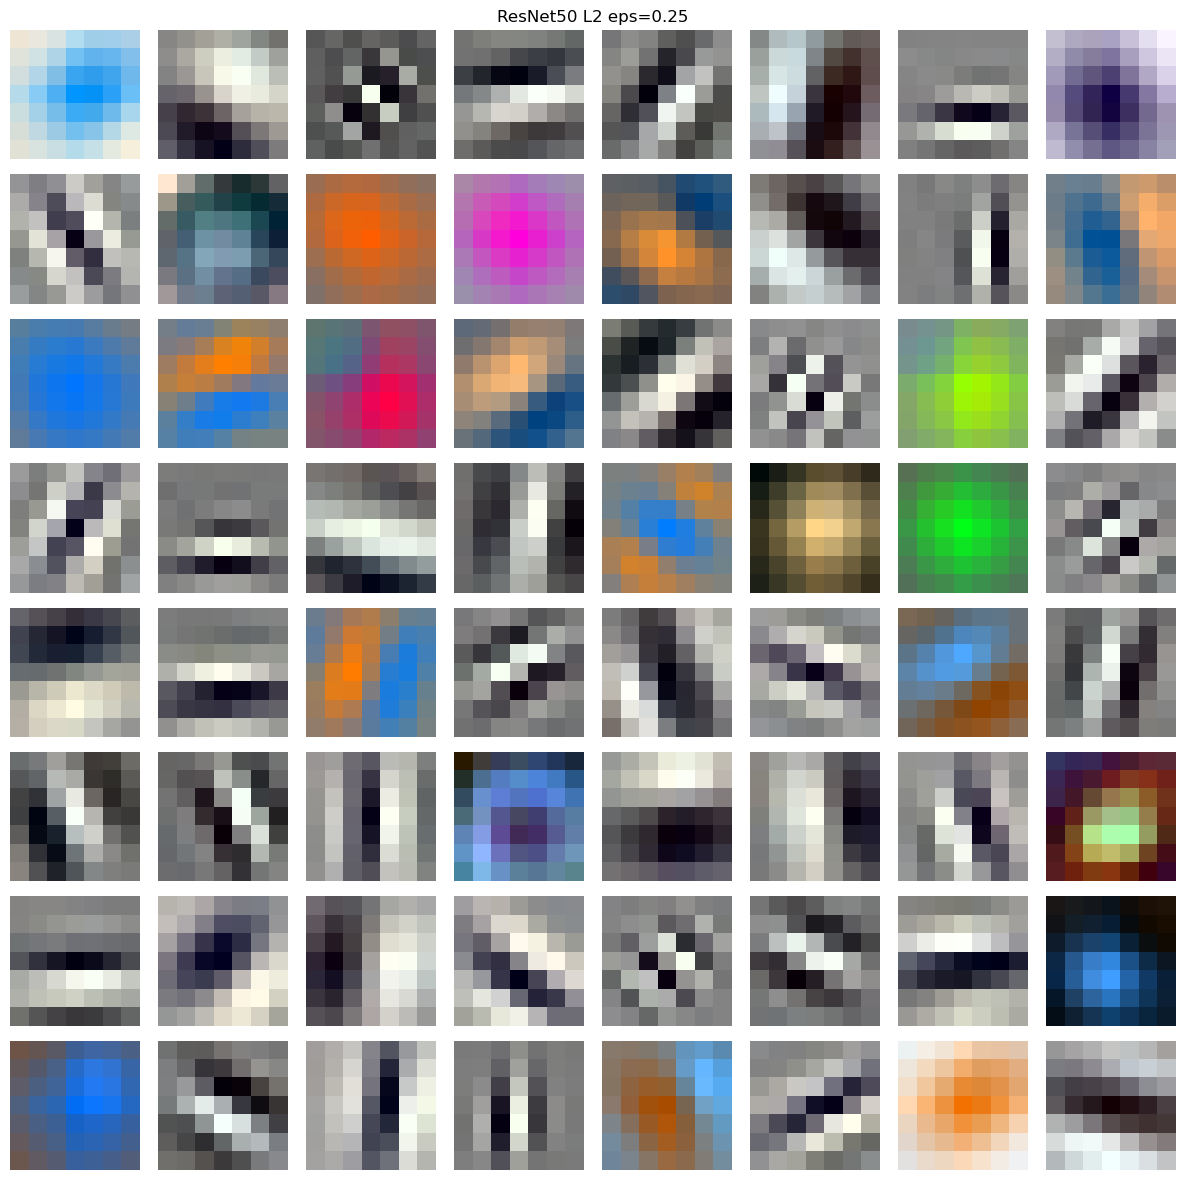

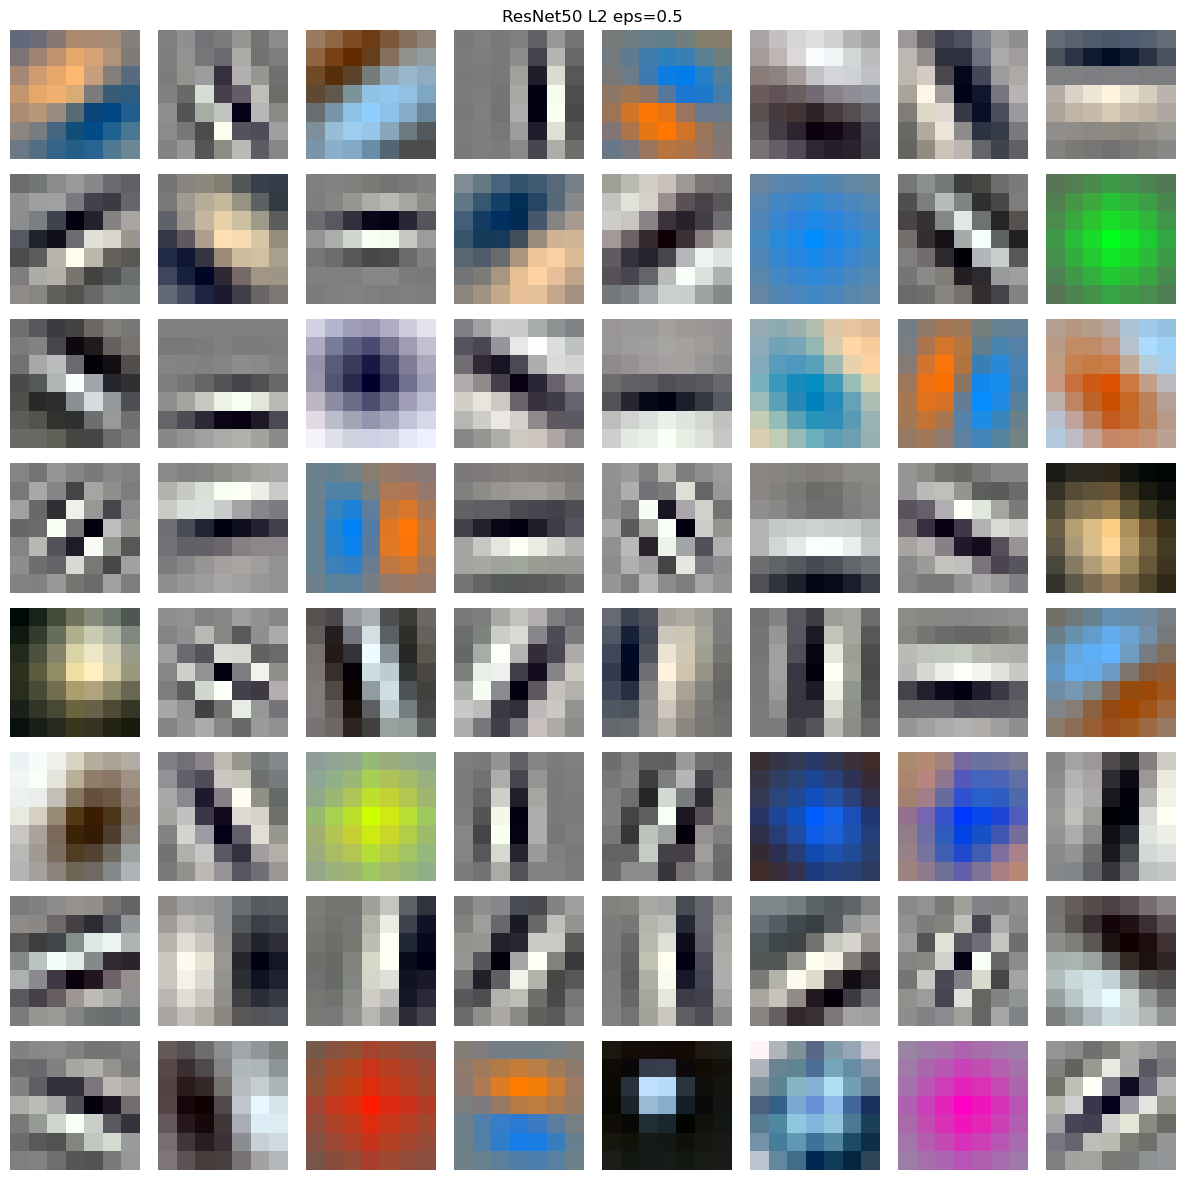

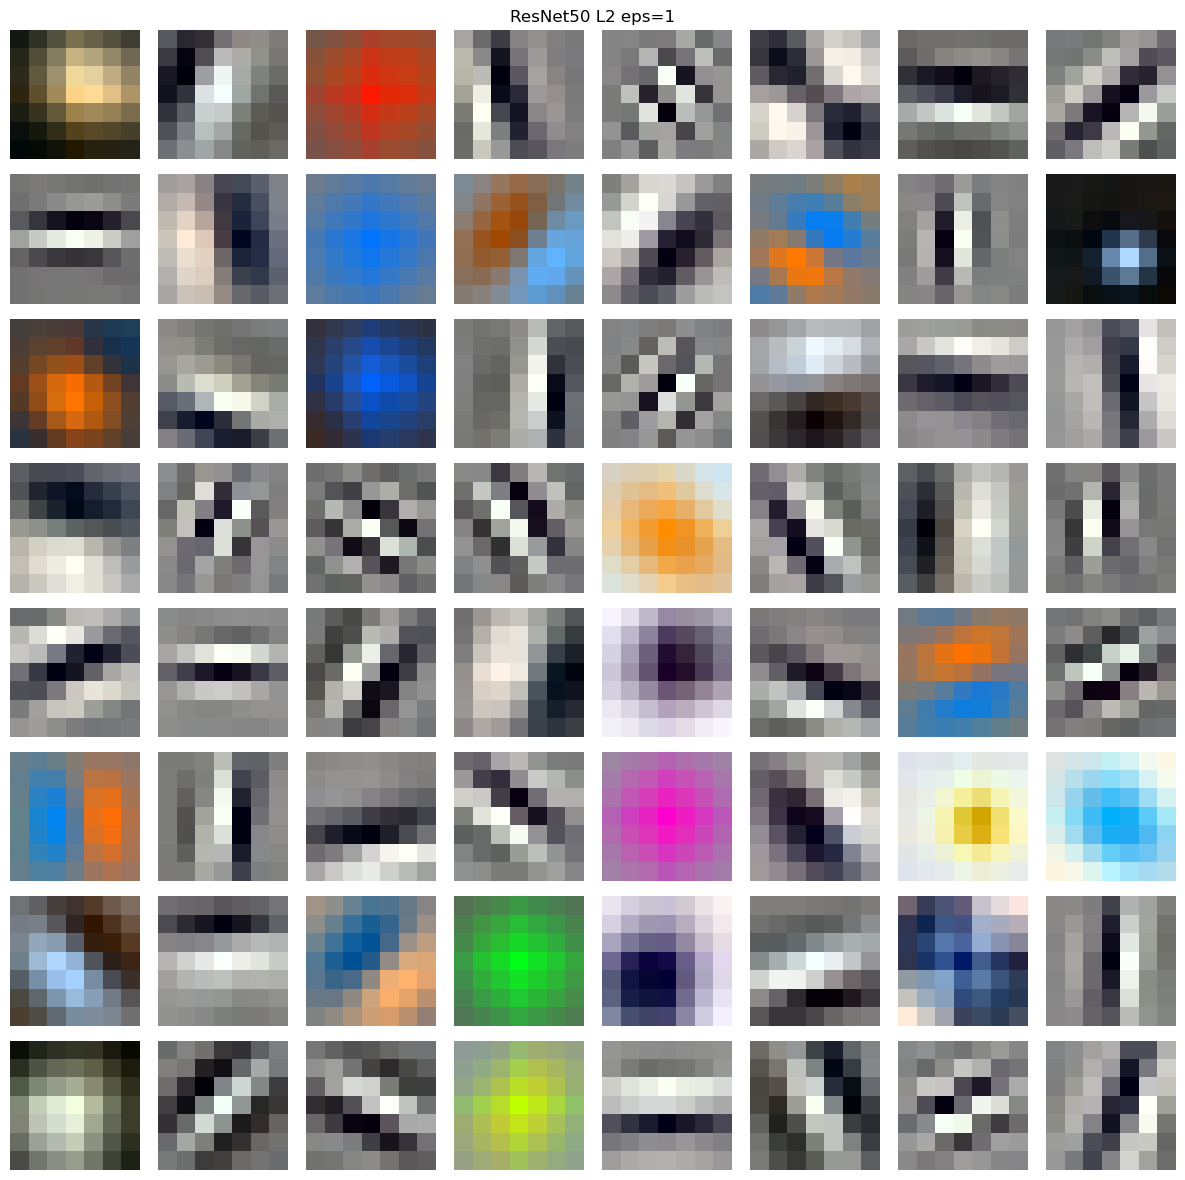

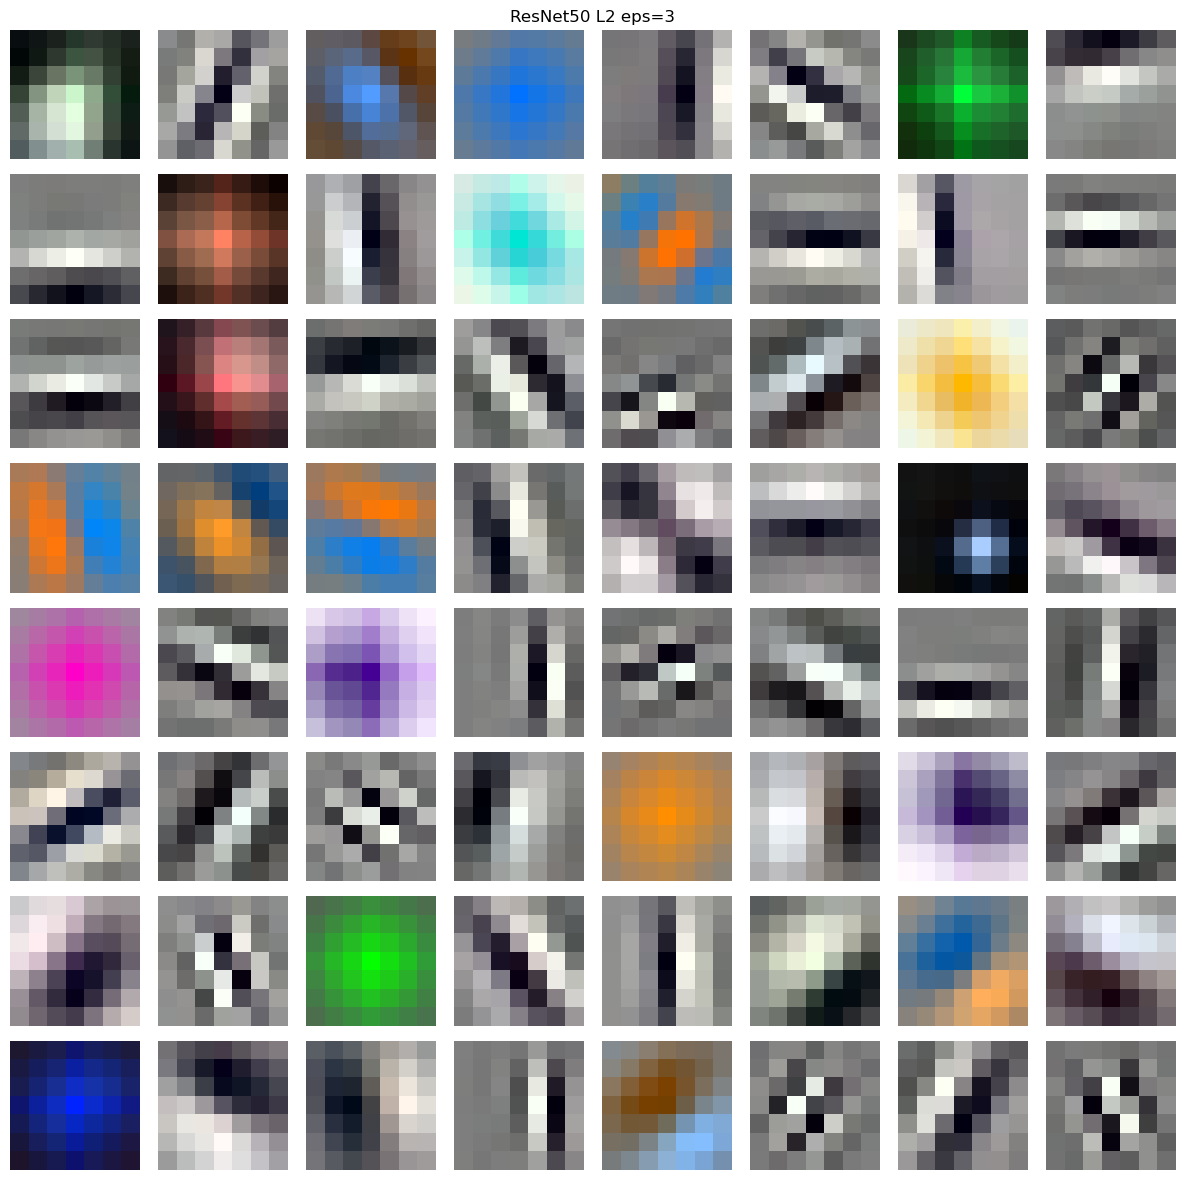

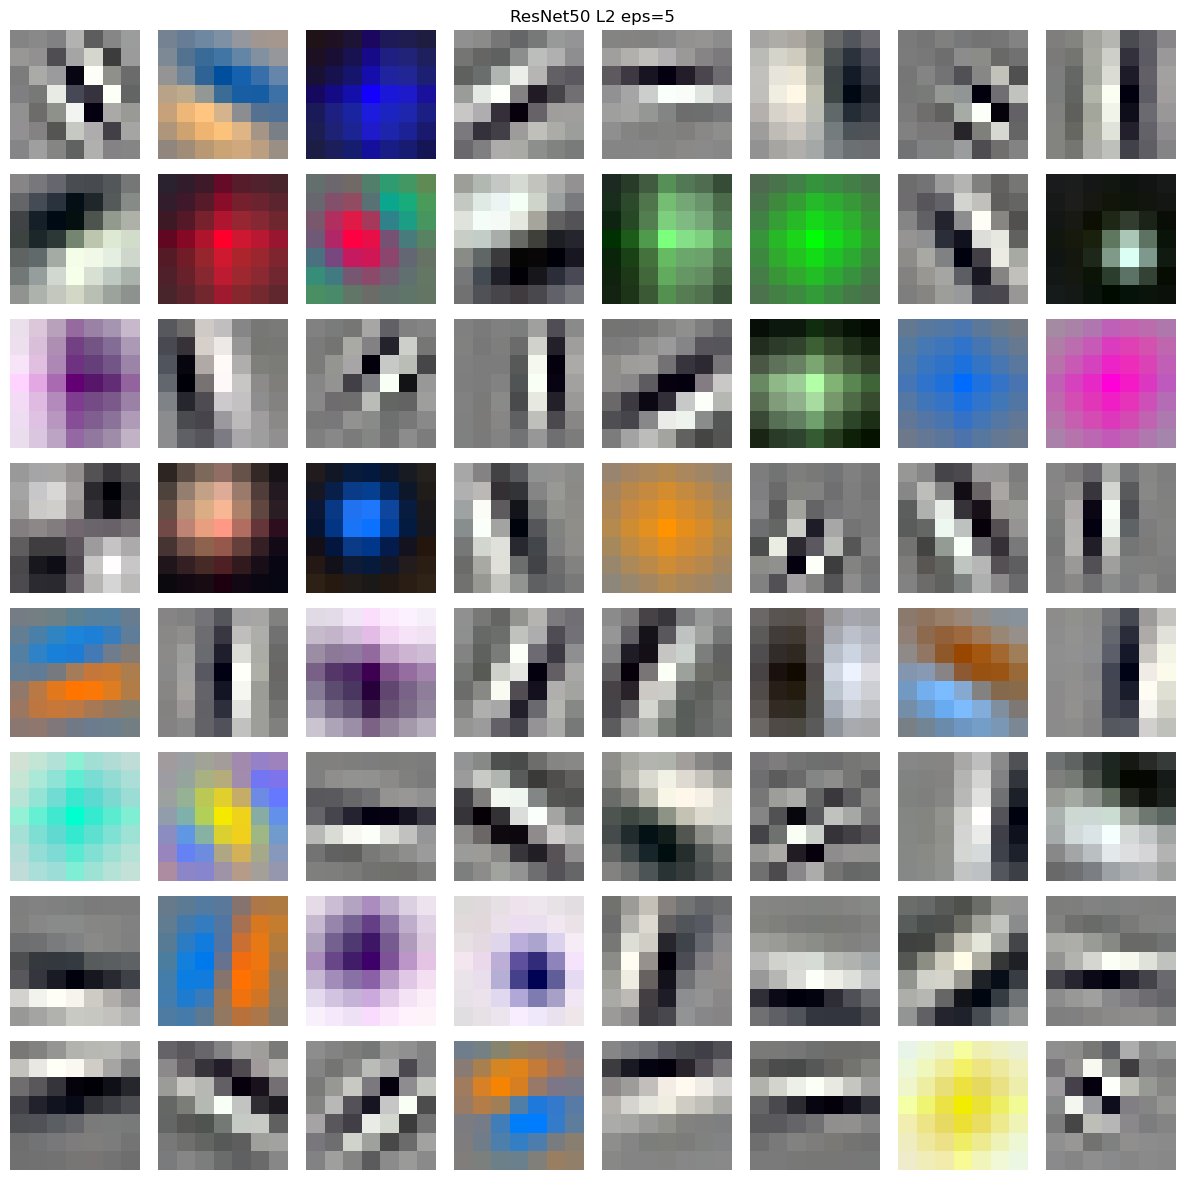

In [38]:
for eps in [0, 0.1, 0.25, 0.5, 1, 3, 5]:
    robust_model, robust_transform = load_robust_model(f'resnet50_l2_eps{eps}')
    visualize_filters(robust_model.conv1.weight.detach().cpu(), f'ResNet50 L2 eps={eps}')

### Maco of several robust

In [10]:

from horama import maco, plot_maco
from pprint import pprint
from torchvision import transforms as T
normalizer = T.Compose([
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    T.Resize([224,224])
])

{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.01,
 'total_steps': 500,
 'values_range': (0, 1)}
Maco of ResNet50 Linf eps=0


 20%|█▉        | 98/500 [00:00<00:03, 100.67it/s]

100%|██████████| 500/500 [00:04<00:00, 100.66it/s]


Maco of ResNet50 Linf eps=0.5


100%|██████████| 500/500 [00:04<00:00, 100.34it/s]


Maco of ResNet50 Linf eps=1.0


100%|██████████| 500/500 [00:04<00:00, 100.99it/s]


Maco of ResNet50 Linf eps=2.0


100%|██████████| 500/500 [00:04<00:00, 101.16it/s]


Maco of ResNet50 Linf eps=4.0


100%|██████████| 500/500 [00:04<00:00, 100.48it/s]


Maco of ResNet50 Linf eps=8.0


100%|██████████| 500/500 [00:04<00:00, 100.44it/s]


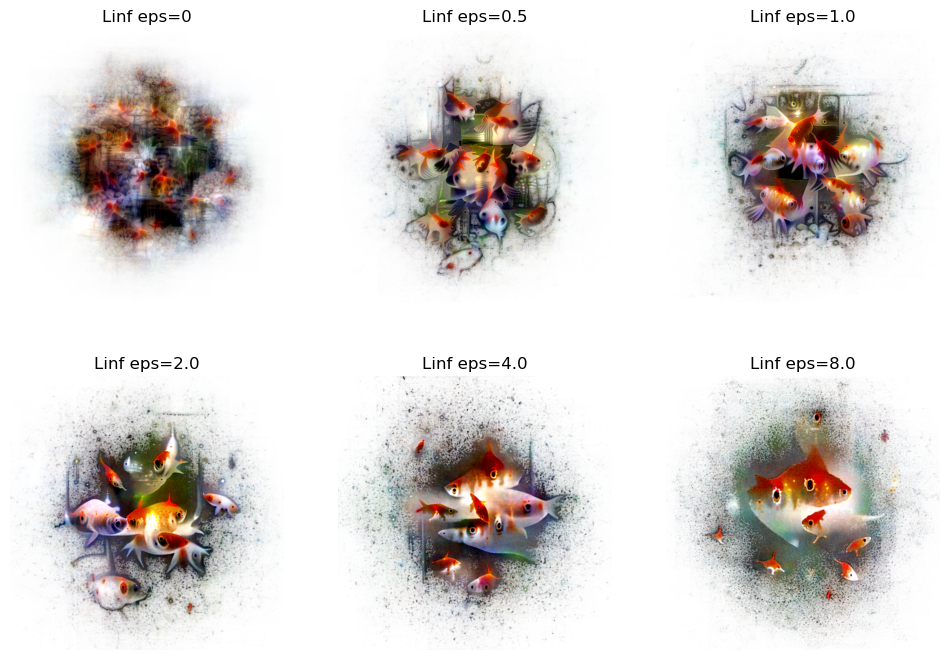

In [21]:
maco_hyperparams = dict(total_steps=500, learning_rate=0.5, image_size=512,
        model_input_size=224, noise=0.01, values_range=(0, 1),
        crops_per_iteration=2, box_size=(0.20, 0.25),)
pprint(maco_hyperparams)

figh, axes = plt.subplots(2, 3, figsize=(12, 8.25))
axes = axes.ravel()
for i, eps in enumerate([0, 0.5, 1.0, 2.0, 4.0, 8.0]):
    robust_model, robust_transform = load_robust_model(f'resnet50_linf_eps{eps}')
    # visualize_filters(robust_model.conv1.weight.detach().cpu(), f'ResNet50 Linf eps={eps}')
    
    def objective_anti_alias(img):
        return robust_model(normalizer(img))[:,1].mean()
    
    print(f'Maco of ResNet50 Linf eps={eps}')
    image1, alpha1 = maco(objective_anti_alias, **maco_hyperparams, device='cuda')
    plt.sca(axes[i])
    plot_maco(image1, alpha1)
    plt.title(f'Linf eps={eps}')
plt.show()

In [14]:
from inspect import signature, getsource
print("Function signature:")
print(signature(plot_maco))
print("\nFunction source code:")
print(getsource(plot_maco))

Function signature:
(image, alpha, percentile_image=1.0, percentile_alpha=80)

Function source code:
def plot_maco(image, alpha, percentile_image=1.0, percentile_alpha=80):
    # visualize image with alpha mask overlay after normalization and clipping
    image, alpha = check_format(image), check_format(alpha)
    image = clip_percentile(image, percentile_image)
    image = normalize(image)

    # mean of alpha across channels, clipping, and normalization
    alpha = np.mean(alpha, -1, keepdims=True)
    alpha = np.clip(alpha, None, np.percentile(alpha, percentile_alpha))
    alpha = alpha / alpha.max()

    # overlay alpha mask on the image
    plt.imshow(np.concatenate([image, alpha], -1))
    plt.axis('off')



{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.01,
 'total_steps': 500,
 'values_range': (0, 1)}


/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Maco of ResNet50 L2 eps=0


100%|██████████| 500/500 [00:04<00:00, 101.48it/s]


Maco of ResNet50 L2 eps=0.03


100%|██████████| 500/500 [00:04<00:00, 101.61it/s]


Maco of ResNet50 L2 eps=0.05


100%|██████████| 500/500 [00:04<00:00, 101.15it/s]


Maco of ResNet50 L2 eps=0.1


100%|██████████| 500/500 [00:04<00:00, 101.83it/s]


Maco of ResNet50 L2 eps=0.25


100%|██████████| 500/500 [00:04<00:00, 101.29it/s]


Maco of ResNet50 L2 eps=0.5


100%|██████████| 500/500 [00:04<00:00, 101.21it/s]


Maco of ResNet50 L2 eps=1


100%|██████████| 500/500 [00:04<00:00, 101.08it/s]


Maco of ResNet50 L2 eps=3


100%|██████████| 500/500 [00:04<00:00, 101.40it/s]


Maco of ResNet50 L2 eps=5


100%|██████████| 500/500 [00:04<00:00, 100.84it/s]


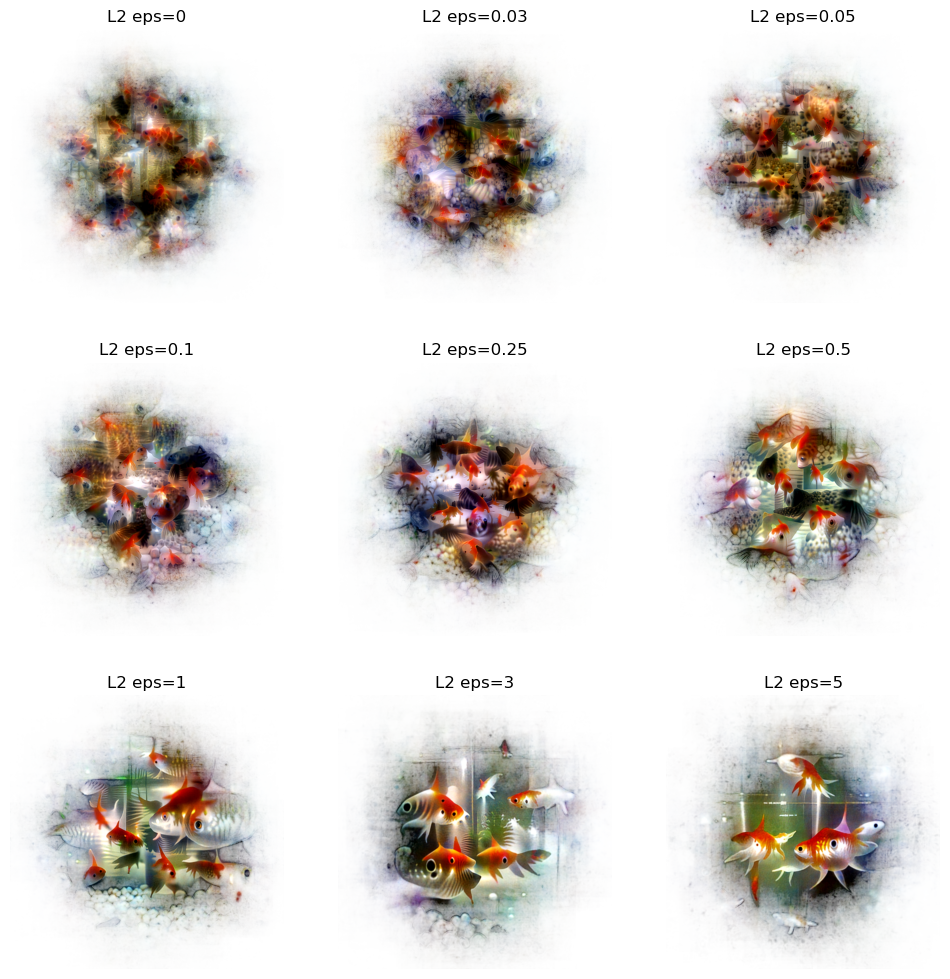

In [20]:
maco_hyperparams = dict(total_steps=500, learning_rate=0.5, image_size=512,
        model_input_size=224, noise=0.01, values_range=(0, 1),
        crops_per_iteration=2, box_size=(0.20, 0.25),)
pprint(maco_hyperparams)

figh, axes = plt.subplots(3, 3, figsize=(12, 12.25))
axes = axes.ravel()
for i, eps in enumerate([0, 0.03, 0.05, 0.1, 0.25, 0.5, 1, 3, 5]):
    robust_model, robust_transform = load_robust_model(f'resnet50_l2_eps{eps}')
    # visualize_filters(robust_model.conv1.weight.detach().cpu(), f'ResNet50 L2 eps={eps}')
    
    def objective_anti_alias(img):
        return robust_model(normalizer(img))[:,1].mean()
    
    print(f'Maco of ResNet50 L2 eps={eps}')
    image1, alpha1 = maco(objective_anti_alias, **maco_hyperparams, device='cuda')
    plt.sca(axes[i])
    plot_maco(image1, alpha1)
    plt.title(f'L2 eps={eps}')
    
plt.show()

{'box_size': (0.2, 0.25),
 'crops_per_iteration': 2,
 'image_size': 512,
 'learning_rate': 0.5,
 'model_input_size': 224,
 'noise': 0.01,
 'total_steps': 500,
 'values_range': (0, 1)}


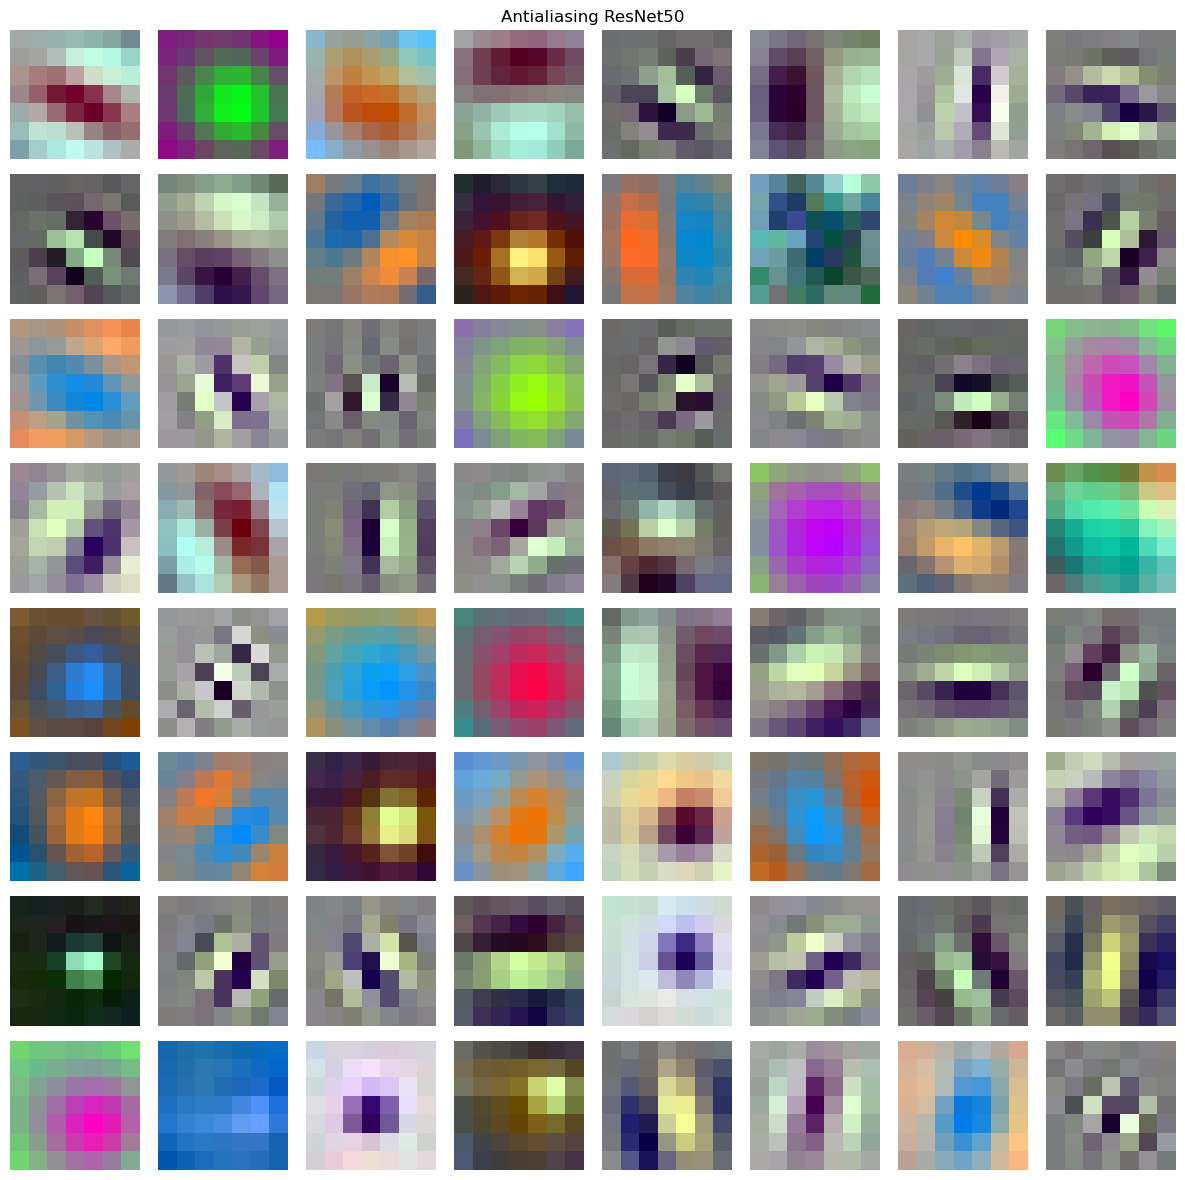

Maco of Antialiasing ResNet50


100%|██████████| 500/500 [00:05<00:00, 95.62it/s]


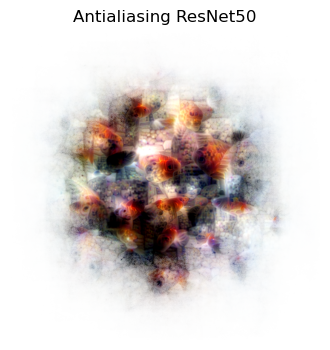

In [24]:
import antialiased_cnns
maco_hyperparams = dict(total_steps=500, learning_rate=0.5, image_size=512,
        model_input_size=224, noise=0.01, values_range=(0, 1),
        crops_per_iteration=2, box_size=(0.20, 0.25),)
pprint(maco_hyperparams)

AA_model = antialiased_cnns.resnet50(pretrained=True) 
AA_model.eval().cuda()
AA_model.requires_grad_(False)
visualize_filters(AA_model.conv1.weight.detach().cpu(), 'Antialiasing ResNet50')
def objective_anti_alias(img):
    return AA_model(normalizer(img))[:,1].mean()

print(f'Maco of Antialiasing ResNet50')
image1, alpha1 = maco(objective_anti_alias, **maco_hyperparams, device='cuda')

figh, axes = plt.subplots(1, 1, figsize=(4, 4.25))
# plt.sca(axes[0])
plot_maco(image1, alpha1)
plt.title(f'Antialiasing ResNet50')

plt.show()